# **Project Name**    -  **Retail Sales Prediction**



##### **Project Type**    - Regression
##### **Contribution**    - Individual 


# **Project Summary**





Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.
You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**


**BUSINESS PROBLEM OVERVIEW**


The interest in a product continues to change occasionally. No business can work on its monetary growth without assessing client interest and future demand of items precisely. Sales forecasting refers to the process of estimating demand for or sales of a particular product over a specific period of time. This project involves solving a real-world business problem of sales forecasting and building up a machine learning model for the same.

Our goal here is to forecast the sales for six weeks for each store and find out the factors influencing it and recommend ways in order to improve the numbers.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from numpy import math
from numpy import loadtxt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import *
import math
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')



### Dataset Loading

In [2]:
from google.colab import drive       
drive.mount('/content/drive')           # Mount drive to acces uploaded csv file .





Mounted at /content/drive


In [3]:
sales_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression/Rossmann Stores Data.csv')
stores_data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Regression/store.csv')



### Dataset First View

In [4]:
# Dataset First 
sales_data.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [5]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [6]:
stores_data.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


### Dataset Rows & Columns count

In [7]:
# Dataset Rows & Columns 
sales_data.shape , stores_data.shape

((1017209, 9), (1115, 10))

### Dataset Information

In [8]:
#info about the sales dataset
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [9]:
#info about the stores
stores_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


#### Missing Values/Null Values

In [10]:
# Missing Values/Null Values Count in sales data
sales_data.isnull().sum()


Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

In [11]:
# Missing Values/Null Values Count in store data
stores_data.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

In [12]:
# filling competition distance with the median value
stores_data['CompetitionDistance'].fillna(stores_data['CompetitionDistance'].median(), inplace = True)

In [13]:
# filling competition open since month and year with the most occuring values of the columns i.e modes of those columns
stores_data['CompetitionOpenSinceMonth'].fillna(stores_data['CompetitionOpenSinceMonth'].mode()[0], inplace = True)
stores_data['CompetitionOpenSinceYear'].fillna(stores_data['CompetitionOpenSinceYear'].mode()[0], inplace = True)

In [14]:
# imputing the nan values of promo2 related columns with 0
stores_data['Promo2SinceWeek'].fillna(value=0,inplace=True)
stores_data['Promo2SinceYear'].fillna(value=0,inplace=True)
stores_data['PromoInterval'].fillna(value=0,inplace=True)

In [15]:
#merge the datasets on stores data
dataset = sales_data.merge(right=stores_data, on="Store", how="left")

In [16]:
dataset.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0


In [17]:
dataset.shape

(1017209, 18)

In [18]:
dataset.isnull().sum()

Store                        0
DayOfWeek                    0
Date                         0
Sales                        0
Customers                    0
Open                         0
Promo                        0
StateHoliday                 0
SchoolHoliday                0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

### What did you know about your dataset?

The datasets given are Rossmann Stores Data (historical data including Sales) and store data (supplemental information about the stores ) from these two datasets we extract the patterns and make the accurate predictions , those predictions will forecasting the sales.<br>
Sales Data : There are 1017209 rows or observations and 9 columns in this dataset. There seems to be no null values in it. It has integer, datetime and object as data types.<br>
Sore Data : There are 1115 rows and 10 columns. There are missing values in it and it is important to impute them with appropriate values in order to get good results later on .

## ***2. Understanding Your Variables***

In [19]:
# Dataset Columns
dataset.columns

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

In [20]:
# Dataset Describe
dataset.describe(include='all')

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
count,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209,1.017209e+06,1017209,1017209,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1017209.0
unique,NaN,NaN,942,NaN,NaN,NaN,NaN,5,NaN,4,3,NaN,NaN,NaN,NaN,NaN,NaN,4.0
top,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,0,NaN,a,a,NaN,NaN,NaN,NaN,NaN,NaN,0.0
freq,NaN,NaN,1115,NaN,NaN,NaN,NaN,855087,NaN,551627,537445,NaN,NaN,NaN,NaN,NaN,NaN,508031.0
first,NaN,NaN,2013-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,NaN,2015-07-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,5.584297e+02,3.998341e+00,NaN,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,NaN,1.786467e-01,NaN,NaN,5.422021e+03,7.787777e+00,2.010060e+03,5.005638e-01,1.164767e+01,1.007011e+03,NaN
std,3.219087e+02,1.997391e+00,NaN,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,NaN,3.830564e-01,NaN,NaN,7.706918e+03,2.778755e+00,5.340757e+00,4.999999e-01,1.532393e+01,1.005877e+03,NaN
min,1.000000e+00,1.000000e+00,NaN,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,2.000000e+01,1.000000e+00,1.900000e+03,0.000000e+00,0.000000e+00,0.000000e+00,NaN
25%,2.800000e+02,2.000000e+00,NaN,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,NaN,0.000000e+00,NaN,NaN,7.100000e+02,6.000000e+00,2.008000e+03,0.000000e+00,0.000000e+00,0.000000e+00,NaN


### Variables Description 

* **Id** - an Id that represents a (Store, Date) duple within the set
* **Store** - a unique Id for each store
* **Sales** - the turnover for any given day (Dependent Variable)
* **Customers** - the number of customers on a given day
* **Open** - an indicator for whether the store was open: 0 = closed, 1 = open
* **StateHoliday** - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* **SchoolHoliday** - indicates if the (Store, Date) was affected by the closure of public schools
* **StoreType** - differentiates between 4 different store models: a, b, c, d
* **Assortment** - describes an assortment level: a = basic, b = extra, c = extended. An assortment strategy in retailing involves the number and type of products that stores display for purchase by consumers.
* **CompetitionDistance** - distance in meters to the nearest competitor store
* **CompetitionOpenSince**[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* **Promo** - indicates whether a store is running a promo on that day
* **Promo2** - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* **Promo2Since**[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

### Check Unique Values for each variable.

In [21]:
# Check Unique Values for each variable.
for i in dataset.columns.tolist():
  print("No. of unique values in ",i,"is",dataset[i].nunique(),".")

No. of unique values in  Store is 1115 .
No. of unique values in  DayOfWeek is 7 .
No. of unique values in  Date is 942 .
No. of unique values in  Sales is 21734 .
No. of unique values in  Customers is 4086 .
No. of unique values in  Open is 2 .
No. of unique values in  Promo is 2 .
No. of unique values in  StateHoliday is 5 .
No. of unique values in  SchoolHoliday is 2 .
No. of unique values in  StoreType is 4 .
No. of unique values in  Assortment is 3 .
No. of unique values in  CompetitionDistance is 655 .
No. of unique values in  CompetitionOpenSinceMonth is 12 .
No. of unique values in  CompetitionOpenSinceYear is 23 .
No. of unique values in  Promo2 is 2 .
No. of unique values in  Promo2SinceWeek is 25 .
No. of unique values in  Promo2SinceYear is 8 .
No. of unique values in  PromoInterval is 4 .


In [22]:
#creating a categorical column list 
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment','CompetitionOpenSinceMonth',
                         'CompetitionOpenSinceYear','Promo2','Promo2SinceWeek','Promo2SinceYear','PromoInterval']

In [23]:
#checking the unique values involved and if all the values are in appropriate datatypes
for col in categorical_variables:
  print(f'Unique values for {col}: {dataset[col].unique()}')

Unique values for DayOfWeek: [5 4 3 2 1 7 6]
Unique values for Open: [1 0]
Unique values for Promo: [1 0]
Unique values for StateHoliday: ['0' 'a' 'b' 'c' 0]
Unique values for SchoolHoliday: [1 0]
Unique values for StoreType: ['c' 'a' 'd' 'b']
Unique values for Assortment: ['a' 'c' 'b']
Unique values for CompetitionOpenSinceMonth: [ 9. 11. 12.  4. 10.  8.  3.  6.  5.  1.  2.  7.]
Unique values for CompetitionOpenSinceYear: [2008. 2007. 2006. 2009. 2015. 2013. 2014. 2000. 2011. 2010. 2005. 1999.
 2003. 2012. 2004. 2002. 1961. 1995. 2001. 1990. 1994. 1900. 1998.]
Unique values for Promo2: [0 1]
Unique values for Promo2SinceWeek: [ 0. 13. 14.  1. 45. 40. 26. 22.  5.  6. 10. 31. 37.  9. 39. 27. 18. 35.
 23. 48. 36. 50. 44. 49. 28.]
Unique values for Promo2SinceYear: [   0. 2010. 2011. 2012. 2009. 2014. 2015. 2013.]
Unique values for PromoInterval: [0 'Jan,Apr,Jul,Oct' 'Feb,May,Aug,Nov' 'Mar,Jun,Sept,Dec']


In [24]:
#change into int type
dataset['StateHoliday'].replace({'0':0}, inplace=True)

In [25]:
#creating features from the date

df = dataset.copy()

#creating features from the date
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['WeekOfYear'] = df['Date'].dt.weekofyear
df['DayOfYear'] = df['Date'].dt.dayofyear
years = df['Year'].unique()
     

## 3. ***Data Wrangling***

### Data Wrangling Code

In [26]:
pd.set_option('display.max_rows',10)
df.sort_values(by='Sales',ascending=False)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
44393,909,1,2015-06-22,41551,1721,1,0,0,0,a,...,9.0,2013.0,1,45.0,2009.0,"Feb,May,Aug,Nov",2015,6,26,173
132946,262,5,2015-04-03,38722,5132,1,1,b,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,4,14,93
101726,262,5,2015-05-01,38484,5458,1,1,a,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,5,18,121
87231,262,4,2015-05-14,38367,5192,1,0,a,1,b,...,5.0,2013.0,0,0.0,0.0,0,2015,5,20,134
424086,57,1,2014-06-16,38037,1970,1,1,0,0,d,...,6.0,2014.0,0,0.0,0.0,0,2014,6,25,167
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298723,762,7,2014-10-26,0,0,0,0,0,0,d,...,9.0,2013.0,1,10.0,2013.0,"Mar,Jun,Sept,Dec",2014,10,43,299
298722,761,7,2014-10-26,0,0,0,0,0,0,a,...,9.0,2012.0,0,0.0,0.0,0,2014,10,43,299
298721,760,7,2014-10-26,0,0,0,0,0,0,a,...,1.0,2011.0,0,0.0,0.0,0,2014,10,43,299
298720,759,7,2014-10-26,0,0,0,0,0,0,a,...,11.0,2012.0,1,31.0,2013.0,"Feb,May,Aug,Nov",2014,10,43,299


In [27]:
# 1 . Average sales on state holiday (0 means no holiday else holiday)
df.groupby(['StateHoliday'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,StateHoliday,Sales
0,0,5947.483893
1,a,290.735686
2,b,214.311510
3,c,168.733171


In [28]:
# 2 . Average sales on school holiday (0 means no holiday else holiday)
df.groupby(['SchoolHoliday'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,SchoolHoliday,Sales
1,1,6476.522207
0,0,5620.979034


In [29]:
# 3 . Average sales as per Sate holiday and school holiday (0 means no holiday else holiday)
df.groupby(['StateHoliday','SchoolHoliday'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,StateHoliday,SchoolHoliday,Sales
1,0,1,7064.095079
0,0,0,5721.138174
4,b,0,431.171488
2,a,0,332.800996
5,b,1,197.398808
3,a,1,169.065514
6,c,1,168.733171


In [30]:
# 4 . Average sales if stores are open or not
df.groupby(['Open'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,Open,Sales
1,1,6955.514291
0,0,0.000000


In [31]:
# 5 .  Average sales based on store type
df.groupby('StoreType')['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,StoreType,Sales
1,b,10058.837334
0,a,5738.179710
2,c,5723.629246
3,d,5641.819243


In [32]:
# 6. Average number of customers as per store type
df.groupby(['StoreType'])['Customers'].mean().reset_index().sort_values(by='Customers',ascending=False)

,StoreType,Customers
1,b,1987.720846
2,c,673.265894
0,a,659.034880
3,d,501.434892


In [33]:
# 7. Average sales with respect to day of week
df.groupby(['DayOfWeek'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,DayOfWeek,Sales
0,1,7809.044510
1,2,7005.244467
4,5,6723.274305
2,3,6555.884138
3,4,6247.575913
5,6,5847.562599
6,7,204.183189


In [34]:
df.groupby(['StoreType','DayOfWeek'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,StoreType,DayOfWeek,Sales
13,b,7,11266.873446
7,b,1,10873.392540
11,b,5,10529.217717
10,b,4,10032.087704
8,b,2,9992.135362
...,...,...,...
24,d,4,6003.426795
5,a,6,5335.876841
6,a,7,40.814943
27,d,7,21.899879


In [35]:
# 8.Average sales as per Assortment
df.groupby(['Assortment'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,Assortment,Sales
1,b,8553.931999
2,c,6058.676567
0,a,5481.026096


In [36]:
df.groupby(['StoreType','Assortment'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,StoreType,Assortment,Sales
4,b,c,17969.556263
2,b,a,10821.619806
3,b,b,8553.931999
1,a,c,6310.867032
8,d,c,5826.407660
6,c,c,5805.782193
5,c,a,5647.174314
0,a,a,5398.858310
7,d,a,5317.885943


In [37]:
# 9. Average sales based on promo2
df.groupby(['Promo2'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,Promo2,Sales
0,0,6124.710161
1,1,5423.718218


In [38]:
# 10. Average sales as per year
df.groupby(['Year'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,Year,Sales
2,2015,5878.245380
1,2014,5833.290704
0,2013,5658.533675


In [39]:
# 11. Average sales as per Month
df.groupby(['Month'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,Month,Sales
11,12,6826.611377
6,7,6064.915711
10,11,6008.111821
2,3,5784.578871
5,6,5760.964375
...,...,...
1,2,5645.253150
8,9,5570.246033
9,10,5537.037419
4,5,5489.639973


In [40]:
# 12. Average sales as per Year and month
df.groupby(['Year','Month'])['Sales'].mean().reset_index().sort_values(by='Sales',ascending=False)

,Year,Month,Sales
23,2014,12,6973.282456
11,2013,12,6703.618140
29,2015,6,6199.203976
22,2014,11,6179.249661
30,2015,7,6142.705511
...,...,...,...
9,2013,10,5429.258788
5,2013,6,5402.162960
4,2013,5,5364.127383
8,2013,9,5322.988430


### What all manipulations have you done and insights you found?

From the given dataset , as per the business logic "Sales" column is the target variable of the dataset . Based on sales variable I did few manipulations on the dataset and find few insights from it .


**1)** **The average number of sales with respect to Stateholiday :-**

*   The average number of sales when there is no state holiday : 5974 (average maximum sales)
*   The average number of sales when there is state holiday : 250 (sales)

**2)** **The average number of sales with respect to Schoolholiday :-**

*   The average number of sales when there is no school holiday : 6476 (average maximum sales)
*   The average number of sales when there is school holiday : 5620 (sales)



**3)** **The average number of sales during no holidays is 5721**




**4)** **The average number of sales with respect to store is open or not :-**

*   When the store is open the average number of sales : 6955 (average maximum sales)
*   When the store is closed the average number of sales : 0 (sales)

**5)** **The average number of sales with respect to Store type :-**

*   The average maximum number of sales belongs to store of type **b** : 10058 (average maximum sales)
*   The average minimum number of sales belongs to store of type **d** : 5641 (average minimum sales)

**6)** **The average number of customers  with respect to Storetype :-**

*   The average maximum number of customers belongs to store of type **b** : 1987 (average maximum customers)
*   The average minimum number of customers belongs to store of type **d** : 501 (average minimum customers)

**7)** **The average number of sales with respect to dayofweek :-**

*   The average maximum number of sales on dayofweek(1) i.e   **Monday** : 7809 (average maximum sales)
*   The average minimum number of sales on dayofweek(7) i.e   **Sunday** : 204 (average minimum sales)

**8)** **The average number of sales with respect to assortment :-**

*   The average maximum number of sales by assortment of type b i.e **extra** : 8553 (average maximum sales)
*   The average minimum number of sales by assortment of type a  i.e  **basic** : 5481 (average minimum sales)

**9)** **The average number of sales with respect to promo2 :-**

*   The average number of sales when there is no promo2 : 6124 (average maximum sales)
*   The average number of sales when there is promo2 : 5423 (sales)

**10)** **The average maximum number of sales are in 2015 i.e 5878 :-**



**11)** **The average maximum number of sales are in the months of December (6828) , July (6064) , November (6008) and March (5784).**



## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

**Hypotheses**<br>

Just by observing the dataset and understanding the features involved in it, the following hypotheses could be framed:

* There's a feature called "DayOfWeek" with the values 1-7 denoting each day of the week. 
* There would be a week off probably Sunday when the stores would be closed and we would get low overall sales.
* Customers would have a positive correlation with Sales.
* The Store type and Assortment strategy involved would be having a certain effect on sales as well. Some premium high quality products would fetch more revenue.
* Promotion should be having a positive correlation with Sales.
Some stores were closed due to refurbishment, those would generate 0 revenue for that time period.
* Stores are influenced by seasonality, probably before holidays sales would be high.

#### Chart - 1 - Bar Plot on Categorical vs Sales (Bivariate Categorical-Numerical)

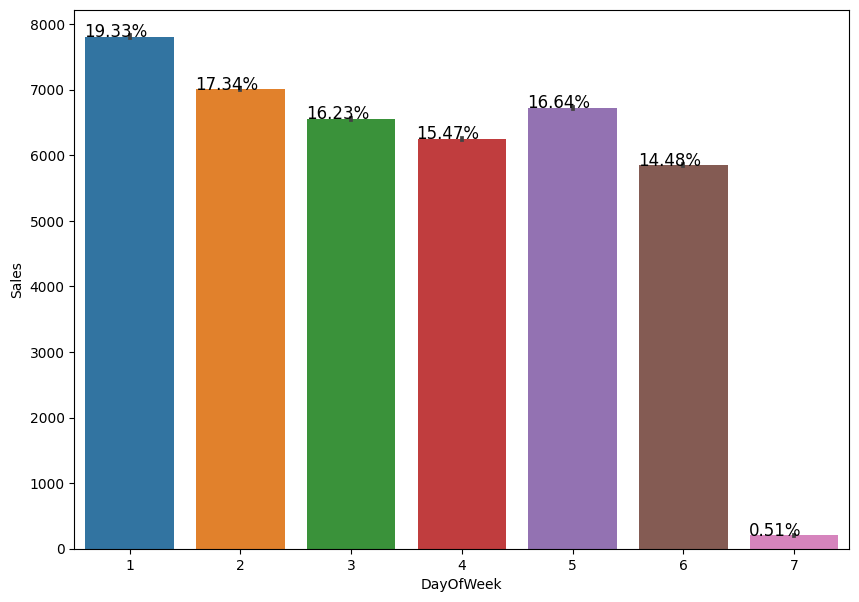

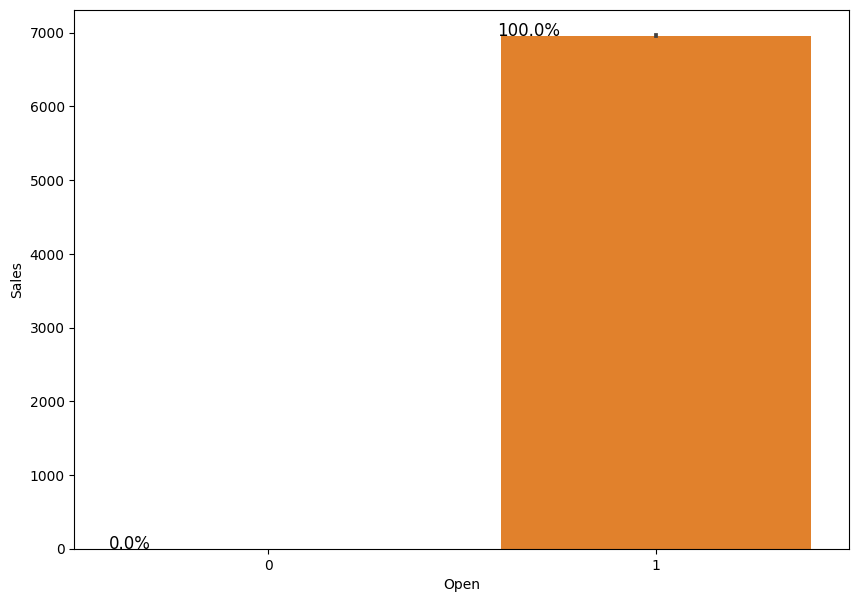

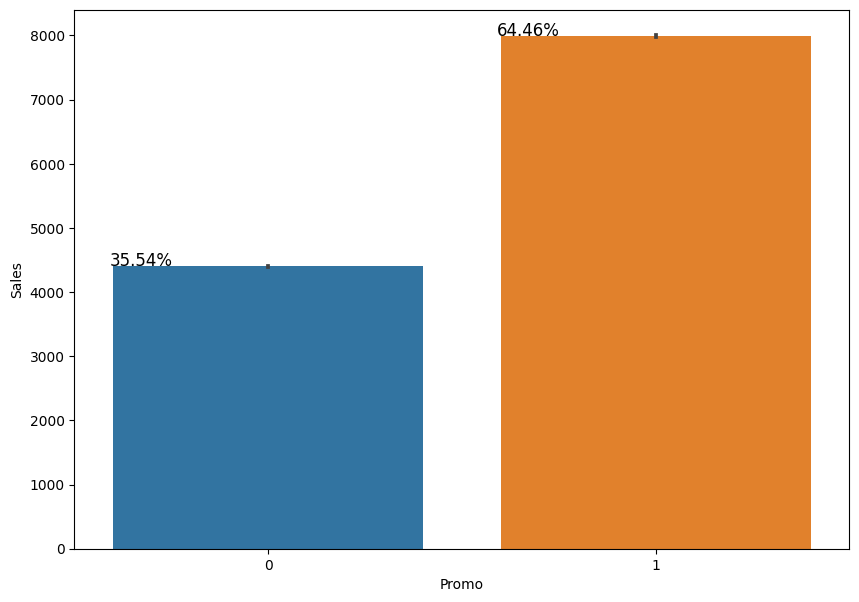

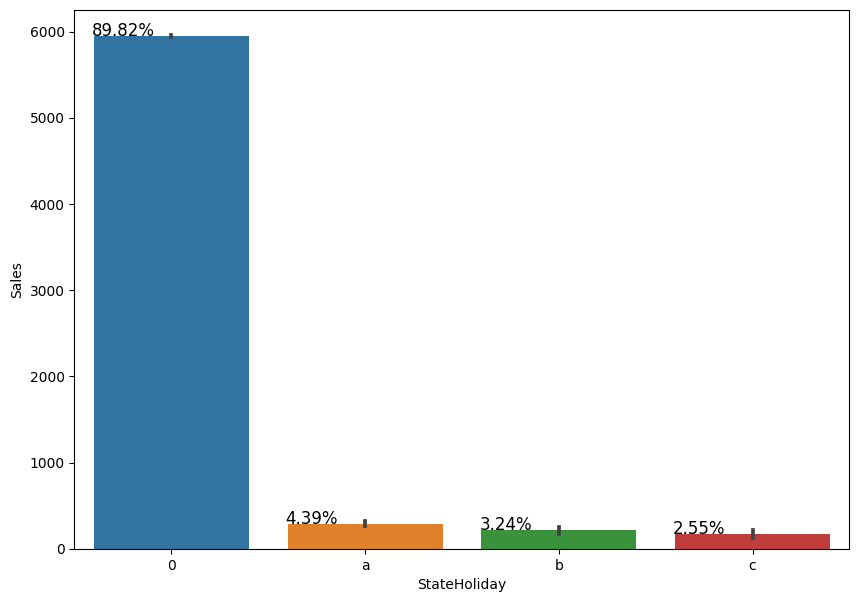

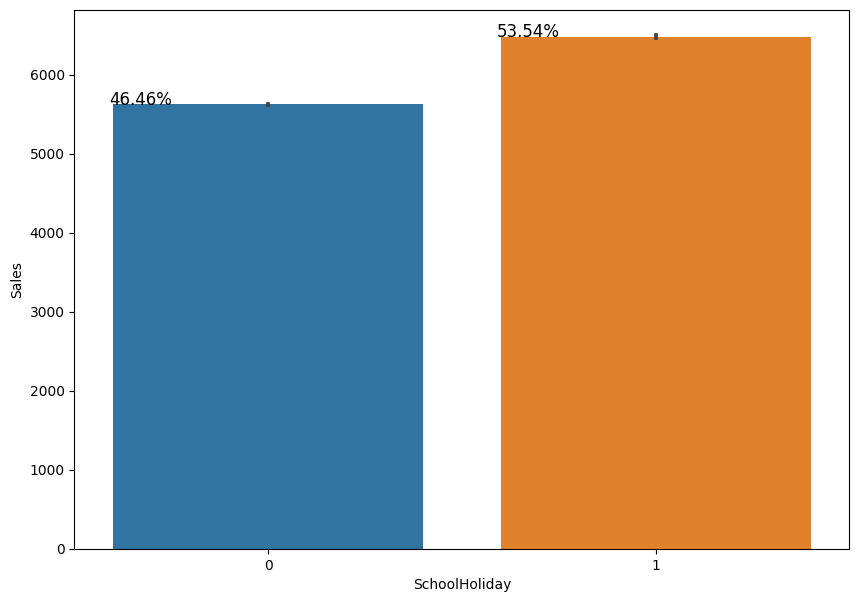

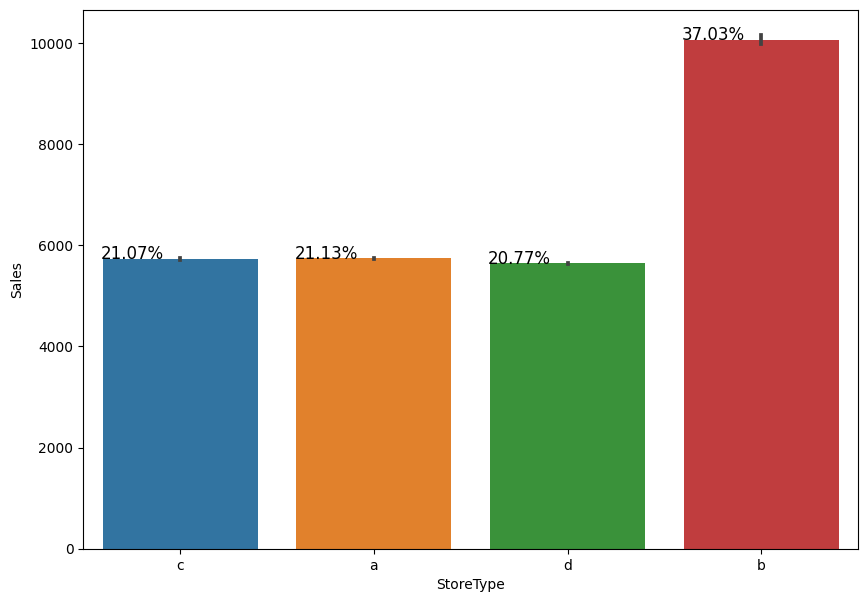

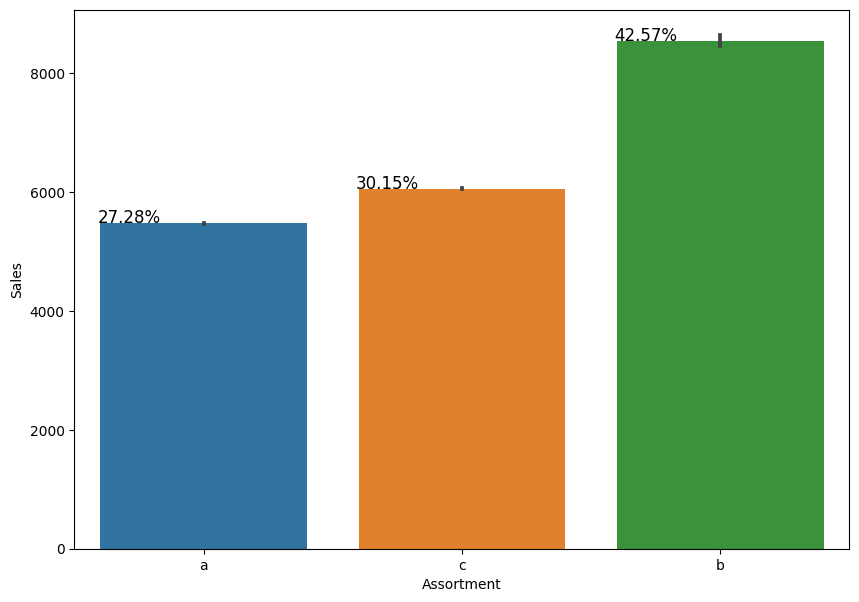

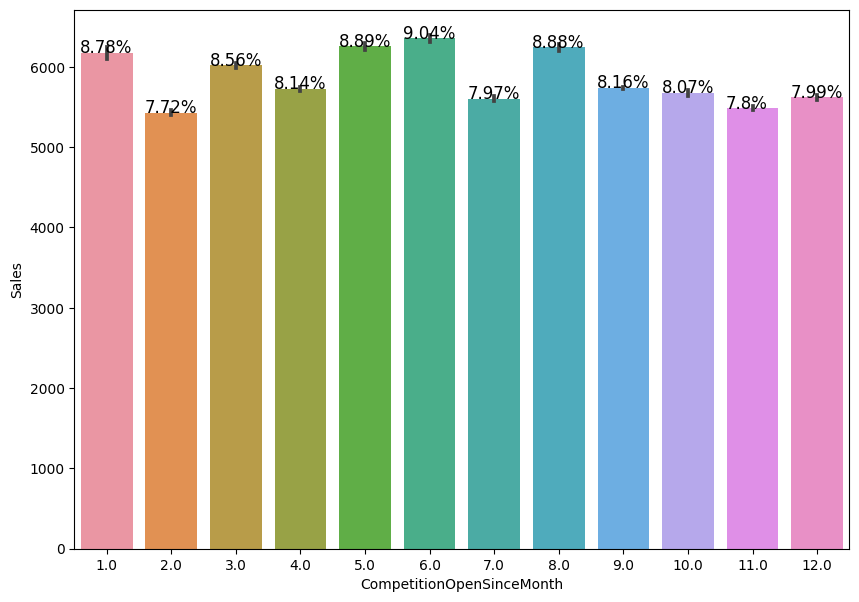

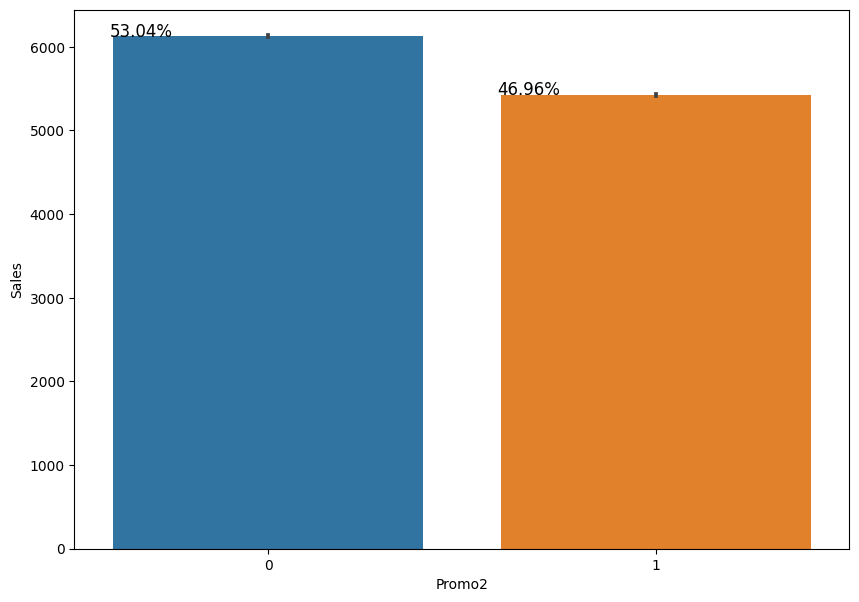

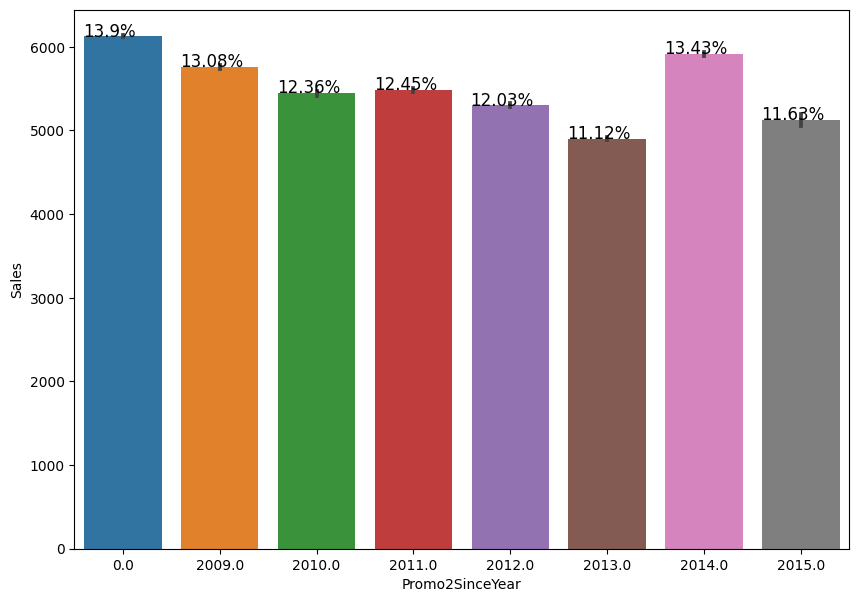

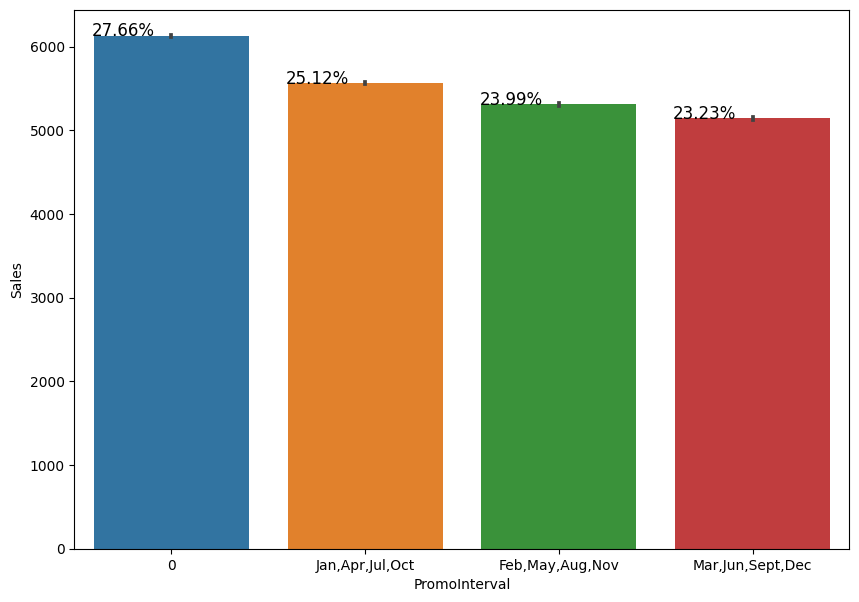

In [41]:
# code for barplot of the categorical variables aganist sales .
# Iterating over the categorical variable plotting each of them .
categorical_variables = ['DayOfWeek','Open','Promo','StateHoliday','SchoolHoliday','StoreType','Assortment',
                         'CompetitionOpenSinceMonth','Promo2','Promo2SinceYear','PromoInterval']
for variable in categorical_variables:
    plt.figure(figsize=(10,7))
    ax = sns.barplot(x=df[variable],y=df['Sales'])
    totals = []
    for i in ax.patches:
        totals.append(i.get_height())
    total = sum(totals)
    for i in ax.patches:  
      ax.text(i.get_x() - .01, i.get_height() + .5, \
              str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)  #text position and formula for percentage
    plt.show()
    

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see ,
* There were more sales on Monday, probably because shops generally remain closed on Sundays.
* It could be seen that the Promo leads to more sales.
* Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None. Lowest of Sales were seen on state holidays especially on Christmas.
* More stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.
On an average Store type B had the highest sales.
* Highest average sales were seen with Assortment levels-b which is 'extra'.
* With Promo2, slightly more sales were seen without it which indicates there are many stores not participating in promo.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**
* More number of sales are on monday , which means more number of products are brought by the customers on monday.
* Promos are attracting the customers .
* The assortment level (extra) gains maximum number of sales .
* School holidays , promos , assortment level (extra) are increasing the number of sales .

**Negative Impact:**
* Less number of sales on state holidays .
* If shop is closed then no sales


#### Chart - 2 - Bar plot on Open vs Sales  (Bivariate with Categorical - Numerical)

<Axes: xlabel='Open', ylabel='Sales'>

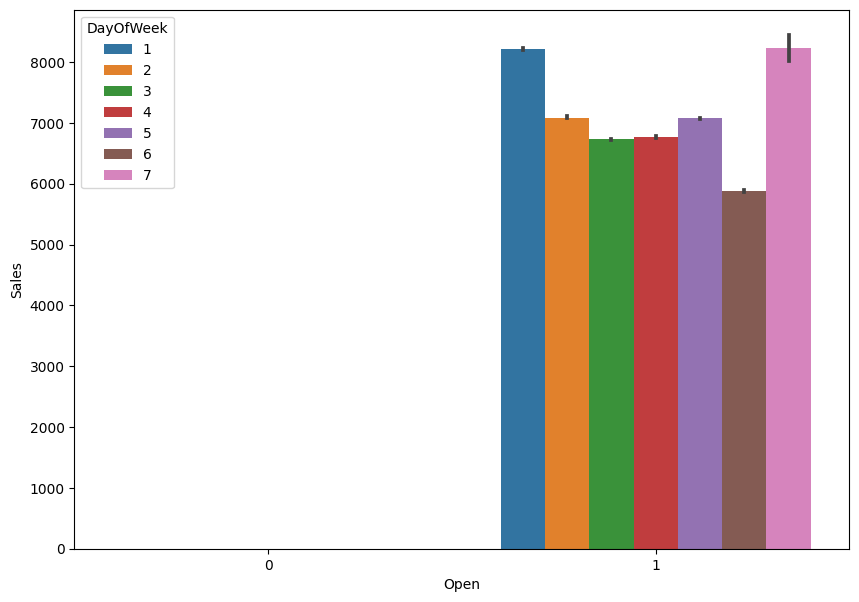

In [42]:
# open and storetype relationship 
#this indicates - Open suggests that whether the store was open or closed for refurbishment and weekends or holidays
plt.figure(figsize=(10,7))
sns.barplot(x=df["Open"],y=df['Sales'],hue=df["DayOfWeek"])

<Axes: xlabel='Open', ylabel='count'>

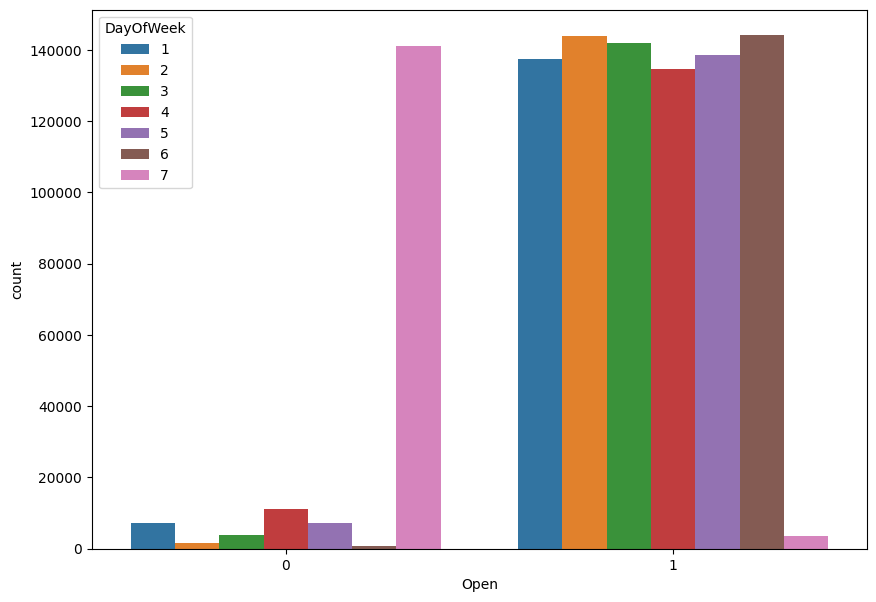

In [43]:
#Lets see open, how many shops are open on which days 
#and this gives a counts of stores closed for refurbishment and suggests that most stores are closed on sunday
plt.figure(figsize=(10,7))
sns.countplot(x=df["Open"], hue=df["DayOfWeek"])

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can see ,
This is a count plot of open shops according to the day of the week. It's clear that the number of shops open on Sundays were very less and hence low sales. Some shops were closed on weekdays as well accounting to the stores closed due to refurbishment or holidays.

#### Chart - 3 - Bar Plot on Store Type vs Sales ,hue is Assortment ( Bivariate Categorical - Numerical )

<Axes: xlabel='StoreType', ylabel='Sales'>

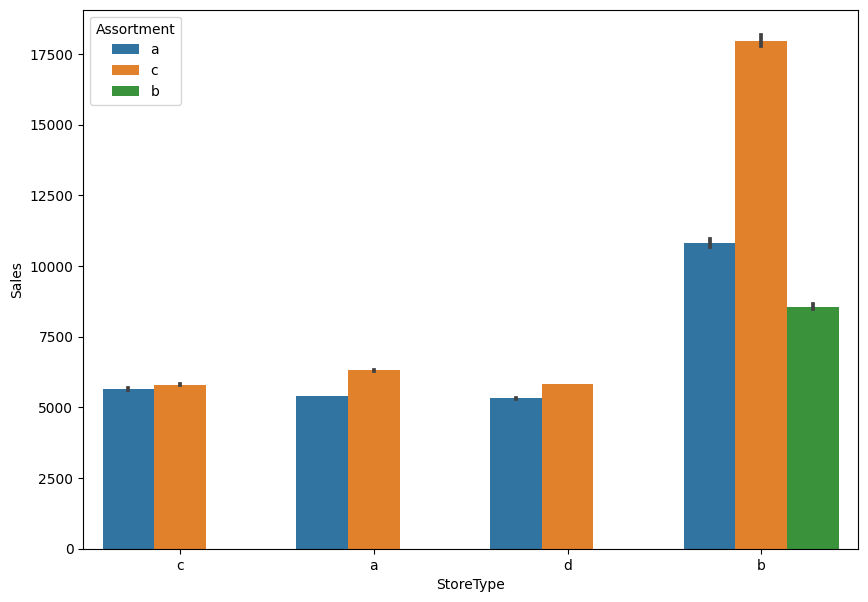

In [44]:

#Let's check the relationship between store type, assortment levels and sales
plt.figure(figsize=(10,7))
sns.barplot(x=df["StoreType"],y=df['Sales'],hue=df["Assortment"])

##### 1. Why did you pick the specific chart?

Bar charts show the frequency counts of values for the different levels of a categorical or nominal variable. Sometimes, bar charts show other statistics, such as percentages.

To show the average percentage of true churn with respect to states, I have used Bar Chart.

##### 2. What is/are the insight(s) found from the chart?

The above bar plot shows that the store types a, c and d have only assortment level a and c. On the other hand the store type b has all the three kinds of assortment strategies, a reason why average sales were high for store type b stores.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Negative Impact:**
* Store Type **a** , **c** and **d** are not following all assotment strategy level i.e assortment(extra) . This lead to less number of sales from stores of type **a**,**c** and **d** . 

#### Chart - 4 - Pie Chart on Categorical vs Sales (Bivariate Categorical-Numerical)

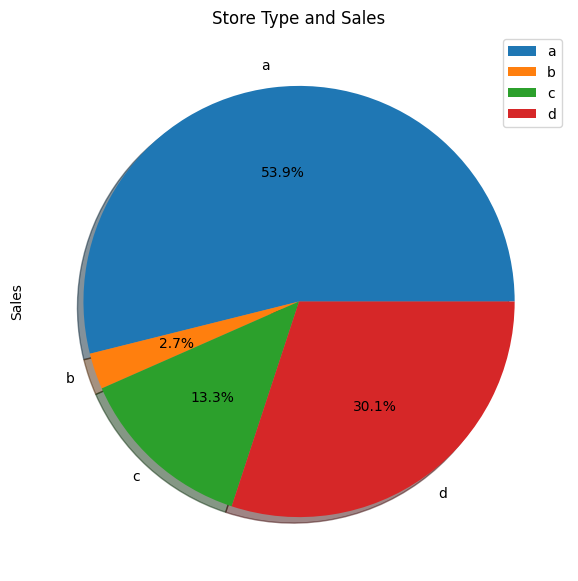

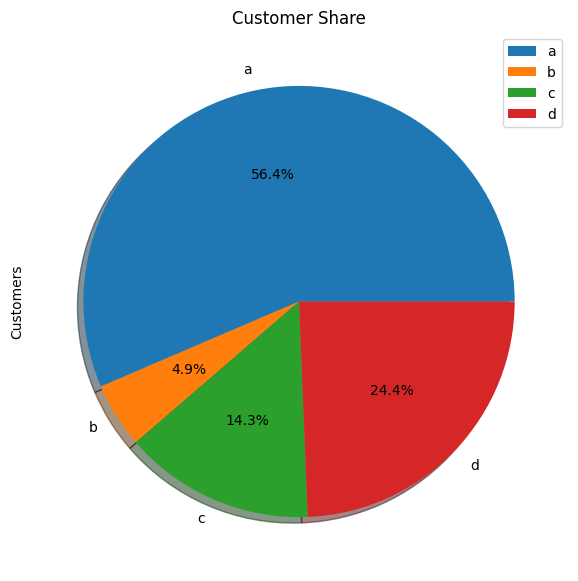

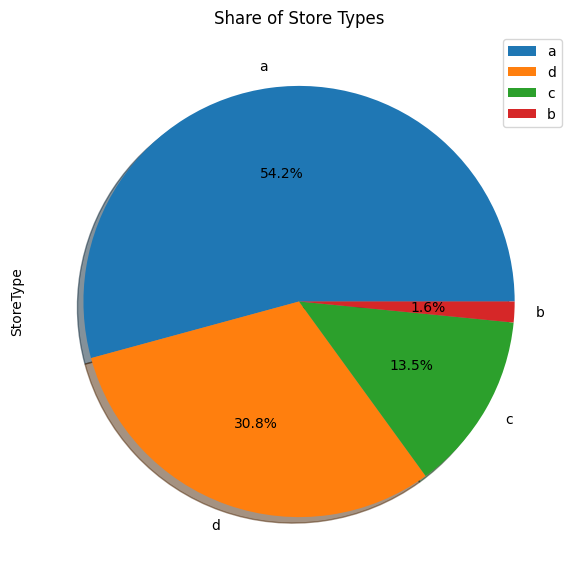

In [45]:
#let's explore store type a bit and it's influence on sales
plt.figure(figsize=(10,7))
df.groupby("StoreType")["Sales"].sum().plot.pie(title='Store Type and Sales', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#customers and store type
plt.figure(figsize=(10,7))
df.groupby("StoreType")["Customers"].sum().plot.pie(title='Customer Share', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()
#store types in all of the dataset
plt.figure(figsize=(10,7))
df["StoreType"].value_counts().plot.pie(title='Share of Store Types', legend=True, autopct='%1.1f%%', shadow=True)
plt.show()

##### 1. Why did you pick the specific chart?

A pie chart expresses a part-to-whole relationship in your data. It's easy to explain the percentage comparison through area covered in a circle with different colors. Where differenet percentage comparison comes into action pie chart is used frequently. So, I used Pie chart and which helped me to get the percentage comparision of the dependant variable.

##### 2. What is/are the insight(s) found from the chart?

* A bar plot represents an estimate of central tendency for a numeric variable with the height of each rectangle. Earlier it was seen that the store type b had the highest sales on an average because the default estimation function to the barplot is mean.
* But upon further exploration it can be clearly observed that the highest sales belonged to the store type a due to the high number of type a stores in our dataset. Store type a and c had a similar kind of sales and customer share.
* Interesting insight to note is that store type b with highest average sales and per store revenue generation looks healthy and a reason for that would be all three kinds of assortment strategies involved which was seen earlier.

##### 3. Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

**Negative Impact:**
* The total number of sales are more from store of type  **a** and **d** and less are from store of type **b** .This is beacuse of more number of stores of type  **a** and **d** .
* But , the average number of maximum sales are from store of type **b** .
* So , Increase the number of stores of type **b** and follow the all stratagies (like adding promos and assortments ) to increase number of sales in stores of type **a** , **c** and **d** .


#### Chart - 5 - Line Plot on Monthly vs Yearly Sales (Bivariate Numerical - Numerical)

In [46]:
#sales over the years
sales_df_2013 = df[df['Year']== 2013]
sales_df_2014 = df[df['Year']==2014]
sales_df_2015 = df[df['Year']== 2015]

In [47]:
#monthly sales
sales_2013 = sales_df_2013.groupby('Month')['Sales'].sum().reset_index()
sales_2014 = sales_df_2014.groupby('Month')['Sales'].sum().reset_index()
sales_2015 = sales_df_2015.groupby('Month')['Sales'].sum().reset_index()
     

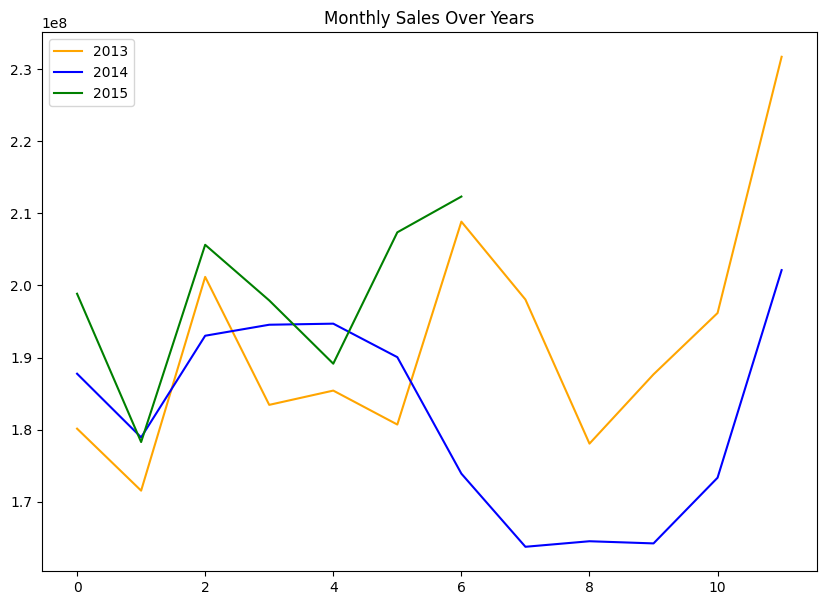

In [48]:
#plotting
plt.figure(figsize=(10,7))
plt.plot(sales_2013.loc[:,'Sales'],label='2013',color='orange')
plt.plot(sales_2014.loc[:,'Sales'],label='2014',color='blue')
plt.plot(sales_2015.loc[:,'Sales'],label='2015',color='green')
plt.title('Monthly Sales Over Years')
plt.legend()

##### 1. Why did you pick the specific chart?

Line plots are useful when you want to visualize the relationship between two variables that are continuous or ordered.
We can use a line plot to compare how different groups change over time or to compare the relationships between different groups.
We can use a line plot to highlight significant events or changes in your data by adding annotations or markers to the plot.

##### 2. What is/are the insight(s) found from the chart?

From the above chart we can say ,<br>
Sales rise up by the end of the year before the holidays. Sales for 2014 went down there for a couple months - July to September, indicating stores closed due to refurbishment.

#### Chart - 6 - Scatter Plot  (Bivariate Numerical-Numerical)

<Axes: xlabel='Customers', ylabel='Sales'>

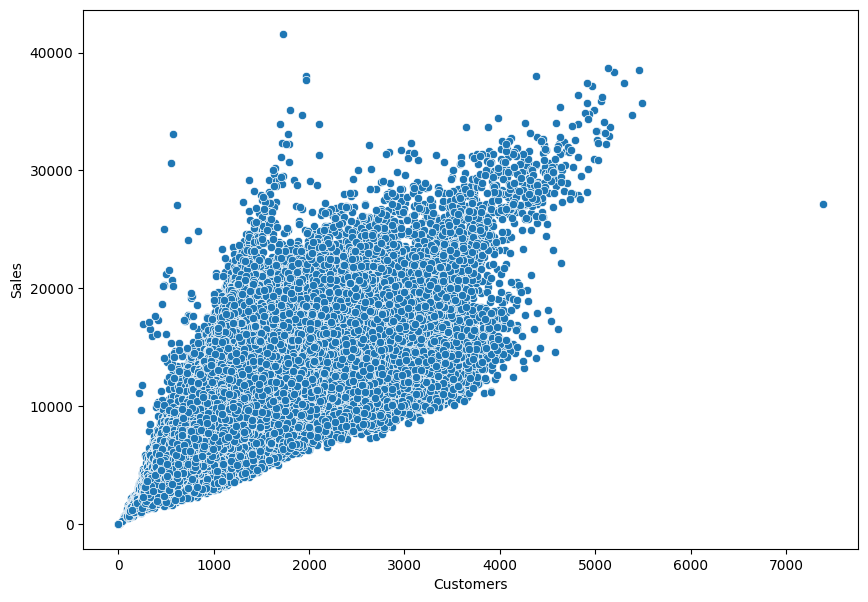

In [49]:
#scatterplot of Customers and Sales
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['Customers'], y=df['Sales'])

<Axes: xlabel='CompetitionDistance', ylabel='Sales'>

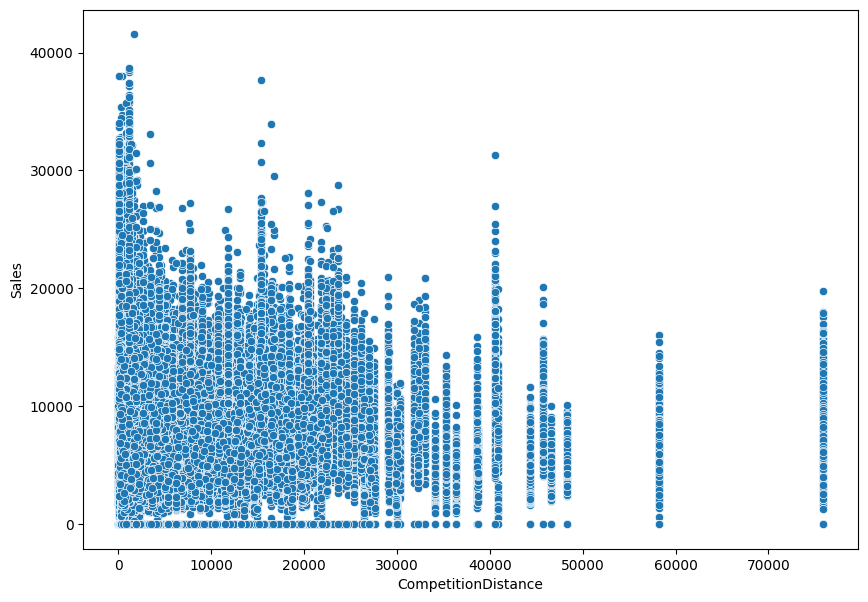

In [50]:
#scatterplot of Competition Distance and Sales
plt.figure(figsize=(10,7))
sns.scatterplot(x=df['CompetitionDistance'], y=df['Sales'])

##### 1. Why did you pick the specific chart?

A scatter plot is a good choice when we want to visualize the relationship between two numerical variables. It allows us to see the distribution of one variable against the other and observe how the points are dispersed. This makes it a useful tool for exploring the relationship between two variables, detecting patterns and trends, and identifying outliers. Additionally, a scatter plot can help you understand the strength and direction of the relationship between the two variables and if there is a linear or non-linear association.

##### 2. What is/are the insight(s) found from the chart?

* Sales and Customer scatter plot shows a direct positive relation between them with a few outliers.
* From the above scatter plot it can be observed that mostly the competitor stores weren't that far from each other and the stores densely located near each other saw more sales.

#### Chart - 7- DistPlot on Sales (Univariate Numerical)

<Axes: ylabel='Density'>

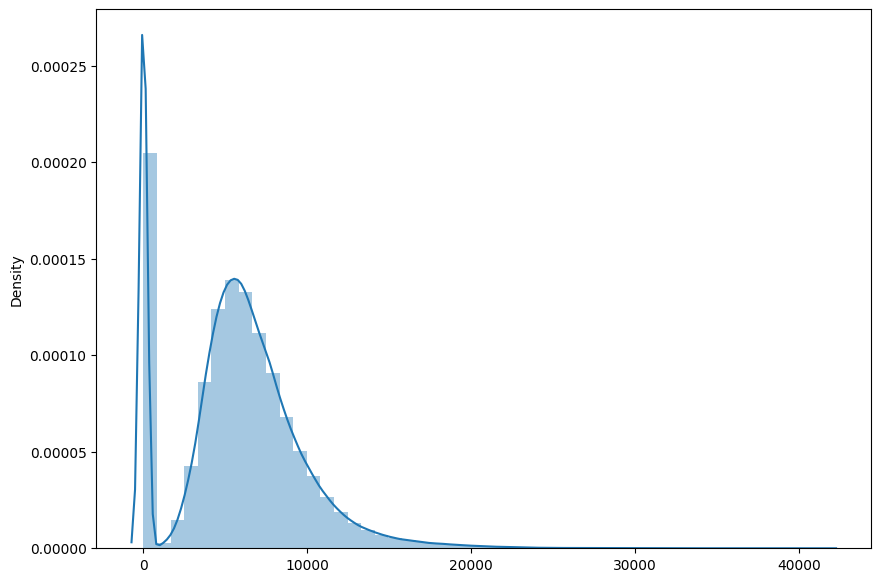

In [51]:
#distribution plot of Sales, as expected positively skewed
plt.figure(figsize=(10,7))
sns.distplot(x=df['Sales'])

##### 1. Why did you pick the specific chart?

The histogram is a popular graphing tool. It is used to summarize discrete or continuous data that are measured on an interval scale. It is often used to illustrate the major features of the distribution of the data in a convenient form. It is also useful when dealing with large data sets (greater than 100 observations). It can help detect any unusual observations (outliers) or any gaps in the data.

Thus, I used the histogram plot to analysis the variable distributions over the whole dataset whether it's symmetric or not.

##### 2. What is/are the insight(s) found from the chart?

* The drop in sales indicates the 0 sales accounting to the stores temporarily closed due to refurbishment. This drop was also seen in the Sales over the years plot earlier.

#### Chart - 8 - Correlation Heatmap

In [52]:
#we need only meaningful numeric columns here, let's drop the unnecessary to get a clear picture
columns_to_drop = ['Store', 'Year', 'WeekOfYear', 'DayOfYear']
corr_df = df.drop(columns = columns_to_drop, axis =1)
corr_df['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

<Axes: >

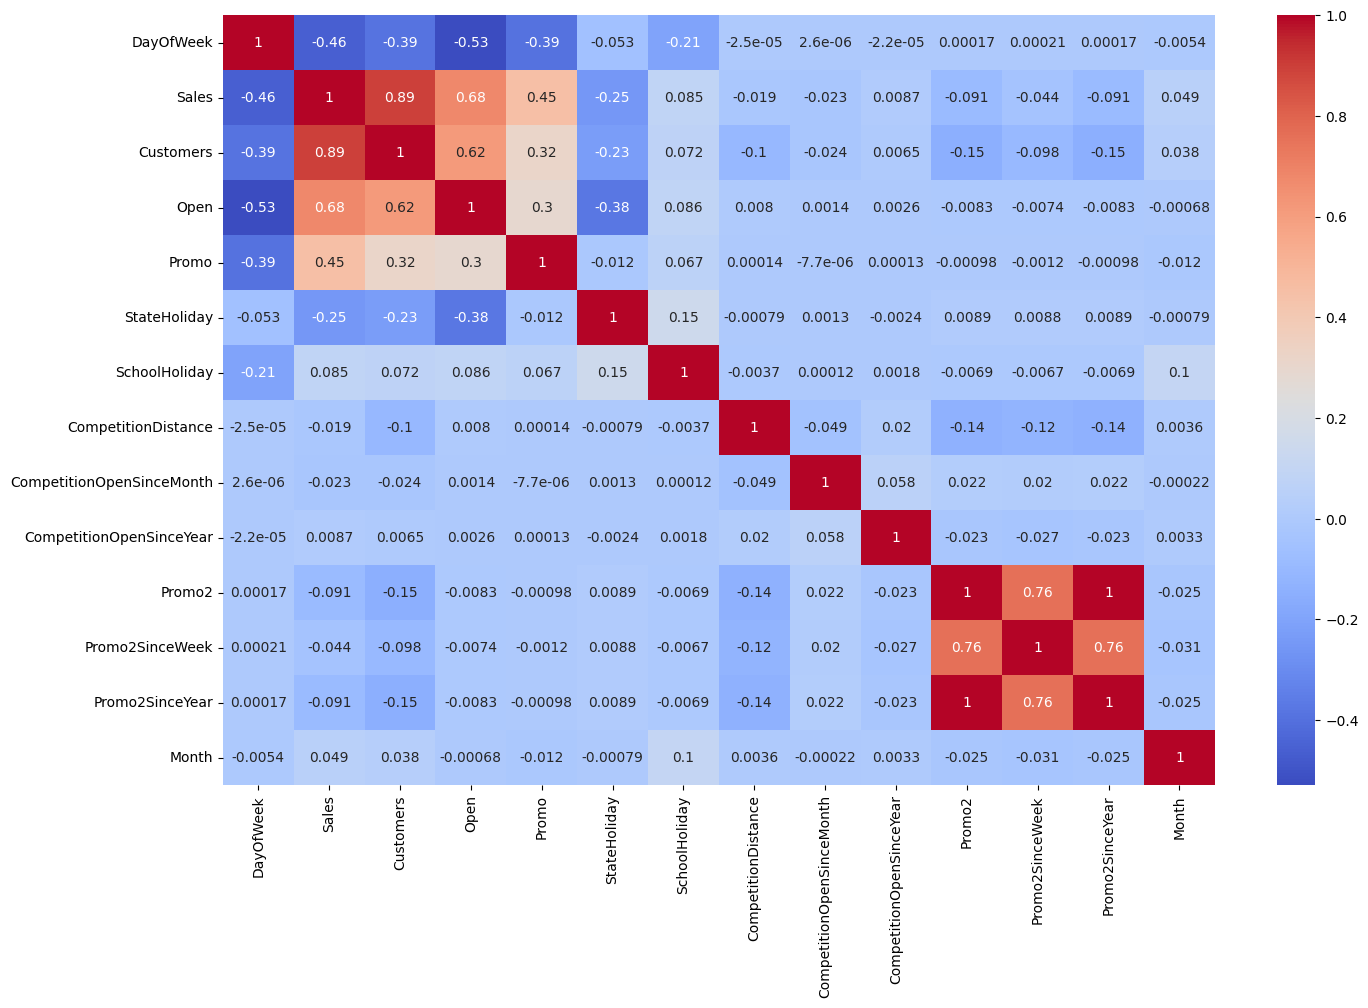

In [53]:

#correlation heatmap
plt.figure(figsize=(16,10))
sns.heatmap(corr_df.corr(), cmap="coolwarm", annot=True)

##### 1. Why did you pick the specific chart?

A correlation matrix is a table showing correlation coefficients between variables. Each cell in the table shows the correlation between two variables. A correlation matrix is used to summarize data, as an input into a more advanced analysis, and as a diagnostic for advanced analyses. The range of correlation is [-1,1].

Thus to know the correlation between all the variables along with the correlation coeficients, i used correlation heatmap.

##### 2. What is/are the insight(s) found from the chart?

* Day of the week has a negative correlation indicating low sales as the weekends, and promo, customers and open has positive correlation.
* State Holiday has a negative correlation suggesting that stores are mostly closed on state holidays indicating low sales.
* CompetitionDistance showing negative correlation suggests that as the distance increases sales reduce, which was also observed through the scatterplot earlier.
* There's multicollinearity involved in the dataset as well. The features telling the same story like Promo2, Promo2 since week and year are showing multicollinearity.
* The correlation matrix is agreeing with all the observations done earlier while exploring through barplots and scatterplots.

## 5. ***Hypothesis Validations***

We can validate the hypothesis by observing the above charts .
The following are the validated hypothesis :
* There's a positive correlation between customers and sales which is explanatory.

* Here it can be deduced that there were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. 

* The positive effect of promotion on Customers and Sales is observable.

* It is clear that most of the stores remain closed during State and School Holidays.

* But it is important to note that more stores were open on School Holidays than on State Holidays and hence had more sales than State Holidays.

* Based on the above findings it seems that there are quite a lot of opportunities in store type 'b' & 'd' as they had more number of customers per store and more sales per customer, respectively. Store type a & c are quite similar in terms of "per customer and per store" sales numbers and just because the majority of the stores were of these kinds, they had the best overall revenue numbers. On the other hand, store type b were very few in number and even then they had better average sales than others.

* Earlier, it was observed that only store type b had all three kinds of assortment levels and rest of the store types had two of them. It seems that in some b type stores the products were different as compared to others because the revenue per store is significantly more than the others.

* When comparing the sales of the three years, it is observable that sales increase by the end of the year indicating that people shop more before the holidays. All the stores showed Christmas seasonality. This validates the previous hypothesis.

* The second thing to notice was that sales dropped for a few months in 2014 accounting for the stores closed due to refurbishment.

* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [54]:
# Handling Missing Values & Missing Value Imputation
df.isnull().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
                ..
PromoInterval    0
Year             0
Month            0
WeekOfYear       0
DayOfYear        0
Length: 22, dtype: int64

#### What all missing value imputation techniques have you used and why did you use those techniques?

In the given datasets only the stores data having missing values in few columns .Those missing values are imputed as per business logic .


### 2. Handling Outliers

In [55]:

# Handling Outliers & Outlier treatments

In [56]:
df1 = df.copy()

In [57]:
df1.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212


Total number of Outliers present in the Sales column are 9731.


[Text(0.5, 1.0, 'Outliers Distribution')]

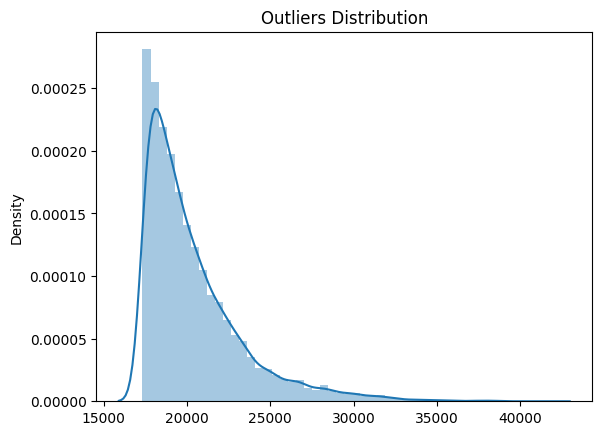

In [58]:
#code to seperate outliers
mean_sales = np.mean(df1['Sales']) #mean
sd_sales = np.std(df1['Sales'])   #standard deviation
#More than 3 standard deviation is an outlier
threshold = 3
#code to identify them
outliers = []
for value in df1['Sales']:
    z_score = (value-mean_sales)/sd_sales
    if z_score > threshold:
        outliers.append(value)
#total no of outliers        
print(f'Total number of Outliers present in the Sales column are {len(outliers)}.')
#plotting the outlier distribution
sns.distplot(x=outliers).set(title='Outliers Distribution')

In [59]:
#percentage of sales greater than 10.2
sales_outliers = df1.loc[df1['Sales']> 10.2]
percentage_of_outliers = (len(sales_outliers)/len(df1))*100
#print
print(f'The percentage of observations of sales greater than 28000 are {percentage_of_outliers}')

The percentage of observations of sales greater than 28000 are 83.00536074690649


In [60]:
#exploring the reasons behind this behaviour
sales_outliers
     

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
0,1,5,2015-07-31,5263,555,1,1,0,1,c,...,9.0,2008.0,0,0.0,0.0,0,2015,7,31,212
1,2,5,2015-07-31,6064,625,1,1,0,1,a,...,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",2015,7,31,212
2,3,5,2015-07-31,8314,821,1,1,0,1,a,...,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",2015,7,31,212
3,4,5,2015-07-31,13995,1498,1,1,0,1,c,...,9.0,2009.0,0,0.0,0.0,0,2015,7,31,212
4,5,5,2015-07-31,4822,559,1,1,0,1,a,...,4.0,2015.0,0,0.0,0.0,0,2015,7,31,212
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1016776,682,2,2013-01-01,3375,566,1,0,a,1,b,...,9.0,2006.0,0,0.0,0.0,0,2013,1,1,1
1016827,733,2,2013-01-01,10765,2377,1,0,a,1,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,1
1016863,769,2,2013-01-01,5035,1248,1,0,a,1,b,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,1
1017042,948,2,2013-01-01,4491,1039,1,0,a,1,b,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,1


**Observation**:<br>
Some interesting insights can be drawn from these outliers dataframe:

* First thing that comes to notice is the DayOfWeek for Store 262. It's sunday and it has high sales and it's of the store type B.
* All other data points had promotion going on and they had a high number of Customers as well indicating no absurd behavior.
* It can be well established that the outliers are showing this behavior for the stores with promotion = 1 and store type B. It would not be wise to treat them because the reasons behind this behavior seems fair.

In [61]:
#lets see which stores were open on Sunday in the outliers dataframe
#store 262
sales_outliers.loc[sales_outliers['DayOfWeek']==7]
     

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
5659,85,7,2015-07-26,11421,1606,1,0,0,0,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,30,207
5696,122,7,2015-07-26,5773,707,1,0,0,0,a,...,4.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5783,209,7,2015-07-26,3742,354,1,0,0,0,a,...,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,30,207
5833,259,7,2015-07-26,15998,2857,1,0,0,0,b,...,9.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5836,262,7,2015-07-26,32547,4783,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011252,733,7,2013-01-06,11226,2584,1,0,0,0,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,6
1011288,769,7,2013-01-06,6995,1764,1,0,0,0,b,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,6
1011382,863,7,2013-01-06,2067,255,1,0,0,0,a,...,11.0,2010.0,0,0.0,0.0,0,2013,1,1,6
1011467,948,7,2013-01-06,6024,1402,1,0,a,0,b,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,6


<Axes: xlabel='DayOfWeek', ylabel='Sales'>

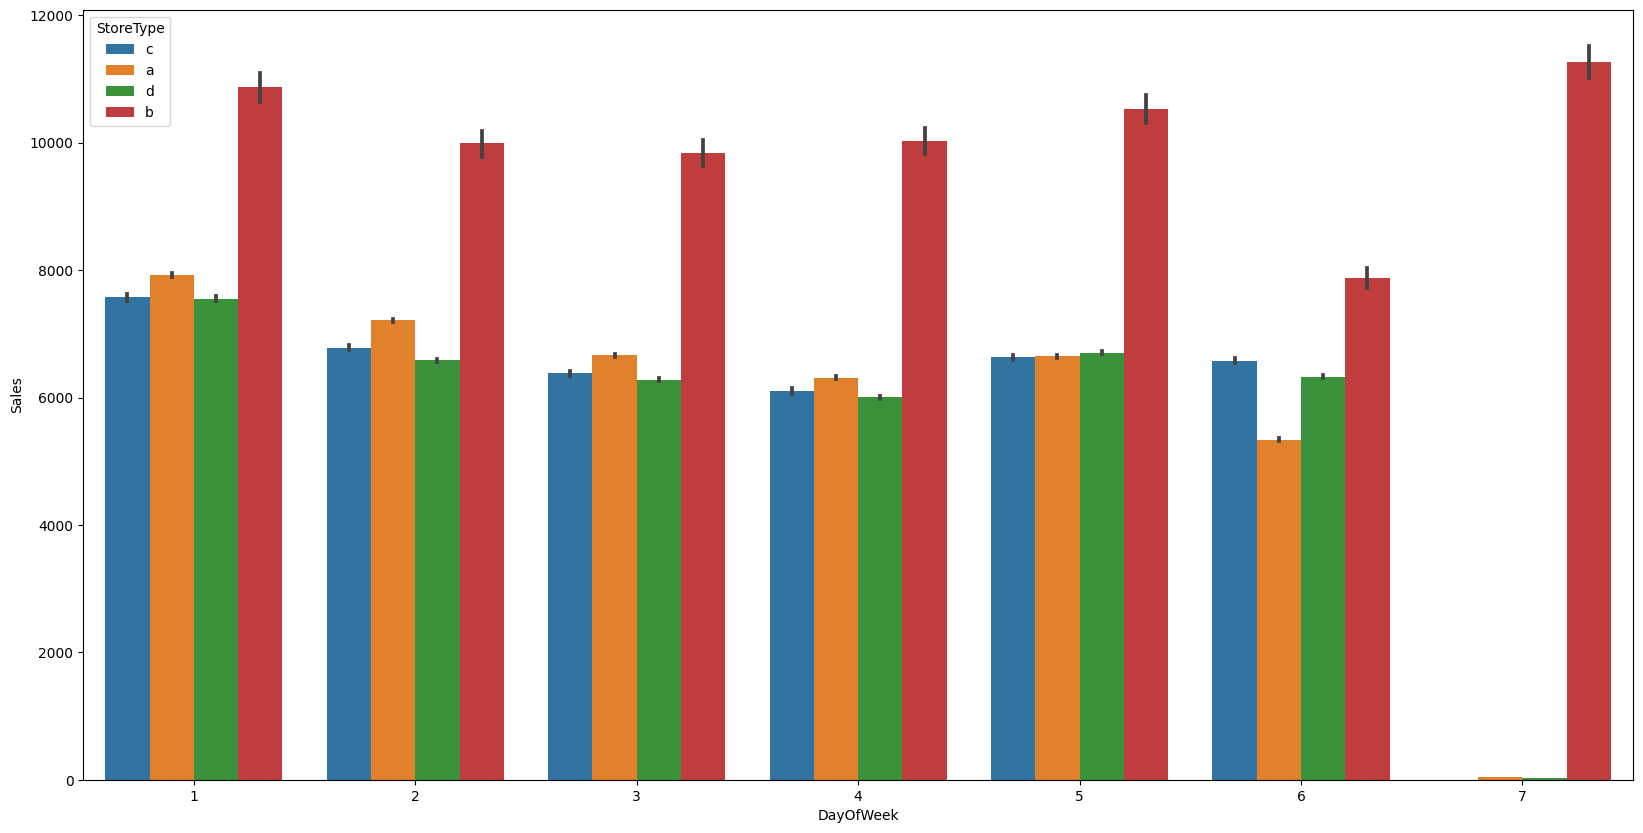

In [62]:
#let's explore store type and Day Of week
plt.figure(figsize=(20,10))
sns.barplot(x=df1['DayOfWeek'],y=df1["Sales"],hue=df1['StoreType'])

In [63]:
#let's verify in the full dataset
df1.loc[(df1['DayOfWeek']==7) & (df1['StoreType']=='b')]

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,...,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Year,Month,WeekOfYear,DayOfYear
5659,85,7,2015-07-26,11421,1606,1,0,0,0,b,...,10.0,2011.0,0,0.0,0.0,0,2015,7,30,207
5833,259,7,2015-07-26,15998,2857,1,0,0,0,b,...,9.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5836,262,7,2015-07-26,32547,4783,1,0,0,0,b,...,5.0,2013.0,0,0.0,0.0,0,2015,7,30,207
5848,274,7,2015-07-26,7750,1608,1,0,0,0,b,...,9.0,2013.0,1,10.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,30,207
5909,335,7,2015-07-26,7988,1509,1,0,0,0,b,...,9.0,2013.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",2015,7,30,207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1011252,733,7,2013-01-06,11226,2584,1,0,0,0,b,...,10.0,1999.0,0,0.0,0.0,0,2013,1,1,6
1011288,769,7,2013-01-06,6995,1764,1,0,0,0,b,...,9.0,2013.0,1,48.0,2012.0,"Jan,Apr,Jul,Oct",2013,1,1,6
1011467,948,7,2013-01-06,6024,1402,1,0,a,0,b,...,9.0,2013.0,0,0.0,0.0,0,2013,1,1,6
1011600,1081,7,2013-01-06,0,0,0,0,0,0,b,...,3.0,2006.0,0,0.0,0.0,0,2013,1,1,6


**Observation:**
* This suggests that store type b had high sales almost all week. No store of type C was open on Sunday.
* Being open 24*7 along with all kinds of assortments available is probably the reason why it had higher average sales than any other store type.

In [64]:
# shape
df1.shape

(1017209, 22)

**Outlier Treatment**<br>

* It can be well established that the outliers are showing this behaviour for the stores with promotion = 1 and store type B. 
* It would not be wise to treat them because the reasons behind this behaviour seems fair and important from the business point of view. 
* The primary reasons for the behaviour are promotion and store type B. If the outliers are a valid occurrence it would be wise not to treat them by deleting or manipulating them especially when we have established the ups and downs of the target variable in relation to the other features.
*  It is well established that there is seasonality involved and no linear relationship is possible to fit. For these kinds of datasets tree based machine learning algorithms are used which are robust to outlier effect.

##### What all outlier treatment techniques have you used and why did you use those techniques?

The outlier treatement technique , which is used in this analysis is " Z Score " .If any value greater than 3 standard deviations that seems to be an outlier .<br>
The outliers in sales column make sense as per business logic .

### 3. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [65]:
# Manipulate Features to minimize feature correlation and create new features

In [66]:
#no of observations for closed stores with 0 sales
(df[df.Open == 0]).shape

(172817, 22)

In [67]:
#since the stores closed had 0 sale value; removing the irrelevant part
df1 = df[df.Open != 0]
df1.drop('Open', axis=1, inplace=True)
     

In [68]:
#changing into boolean 
df1['StateHoliday'].replace({'a':1, 'b':1,'c':1}, inplace=True)

In [69]:
#combining competition open since month and year into total months
df1['CompetitionOpen'] = (df1['Year'] - df1['CompetitionOpenSinceYear'])*12 + (df1['Month'] - df1['CompetitionOpenSinceMonth'])
#correcting the neg values
df1['CompetitionOpen'] = df1['CompetitionOpen'].apply(lambda x:0 if x < 0 else x)
#dropping both the columns
df1.drop(['CompetitionOpenSinceMonth','CompetitionOpenSinceYear'], axis=1,inplace=True)

In [70]:
#changing promo2 features into meaningful inputs
#combining promo2 to total months
df1['Promo2Open'] = (df1['Year'] - df1['Promo2SinceYear'])*12 + (df1['WeekOfYear'] - df1['Promo2SinceWeek'])*0.230137

#correcting the neg values
df1['Promo2Open'] = df1['Promo2Open'].apply(lambda x:0 if x < 0 else x)*df1['Promo2']

#creating a feature for promo interval and checking if promo2 was running in the sale month
def promo2running(df):
  month_dict = {1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun', 7:'Jul', 8:'Aug', 9:'Sept', 10:'Oct', 11:'Nov', 12:'Dec'}
  try:
    months = df['PromoInterval'].split(',')
    if df['Month'] and month_dict[df['Month']] in months:
      return 1
    else:
      return 0
  except Exception:
    return 0

#Applying 
df1['Promo2running'] = df1.apply(promo2running,axis=1)*df1['Promo2']

#Dropping unecessary columns
df1.drop(['Promo2SinceYear','Promo2SinceWeek','PromoInterval'],axis=1,inplace=True)

In [71]:
#setting date and store as index
df1.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
df1.sort_index(inplace=True)

In [72]:
df1.head()

DayOfWeek  Sales  Customers  Promo  StateHoliday  \
Date       Store                                                     
2013-01-01 85             2   4220        619      0             1   
           259            2   6851       1444      0             1   
           262            2  17267       2875      0             1   
           274            2   3102        729      0             1   
           335            2   2401        482      0             1   

                  SchoolHoliday StoreType Assortment  CompetitionDistance  \
Date       Store                                                            
2013-01-01 85                 1         b          a               1870.0   
           259                1         b          b                210.0   
           262                1         b          a               1180.0   
           274                1         b          b               3640.0   
           335                1         b          a                 90.0   

                  Promo2  Year  Month  WeekOfYear  DayOfYear  CompetitionOpen  \
Date       Store                                                                
2013-01-01 85          0  2013      1           1          1             15.0   
           259         0  2013      1           1          1              0.0   
           262         0  2013      1           1          1              0.0   
           274         1  2013      1           1          1              0.0   
           335         1  2013      1           1          1              0.0   

                  Promo2Open  Promo2running  
Date       Store                             
2013-01-01 85            0.0              0  
           259           0.0              0  
           262           0.0              0  
           274           0.0              1  
           335           0.0              1

#### 2. Feature Selection

<Axes: >

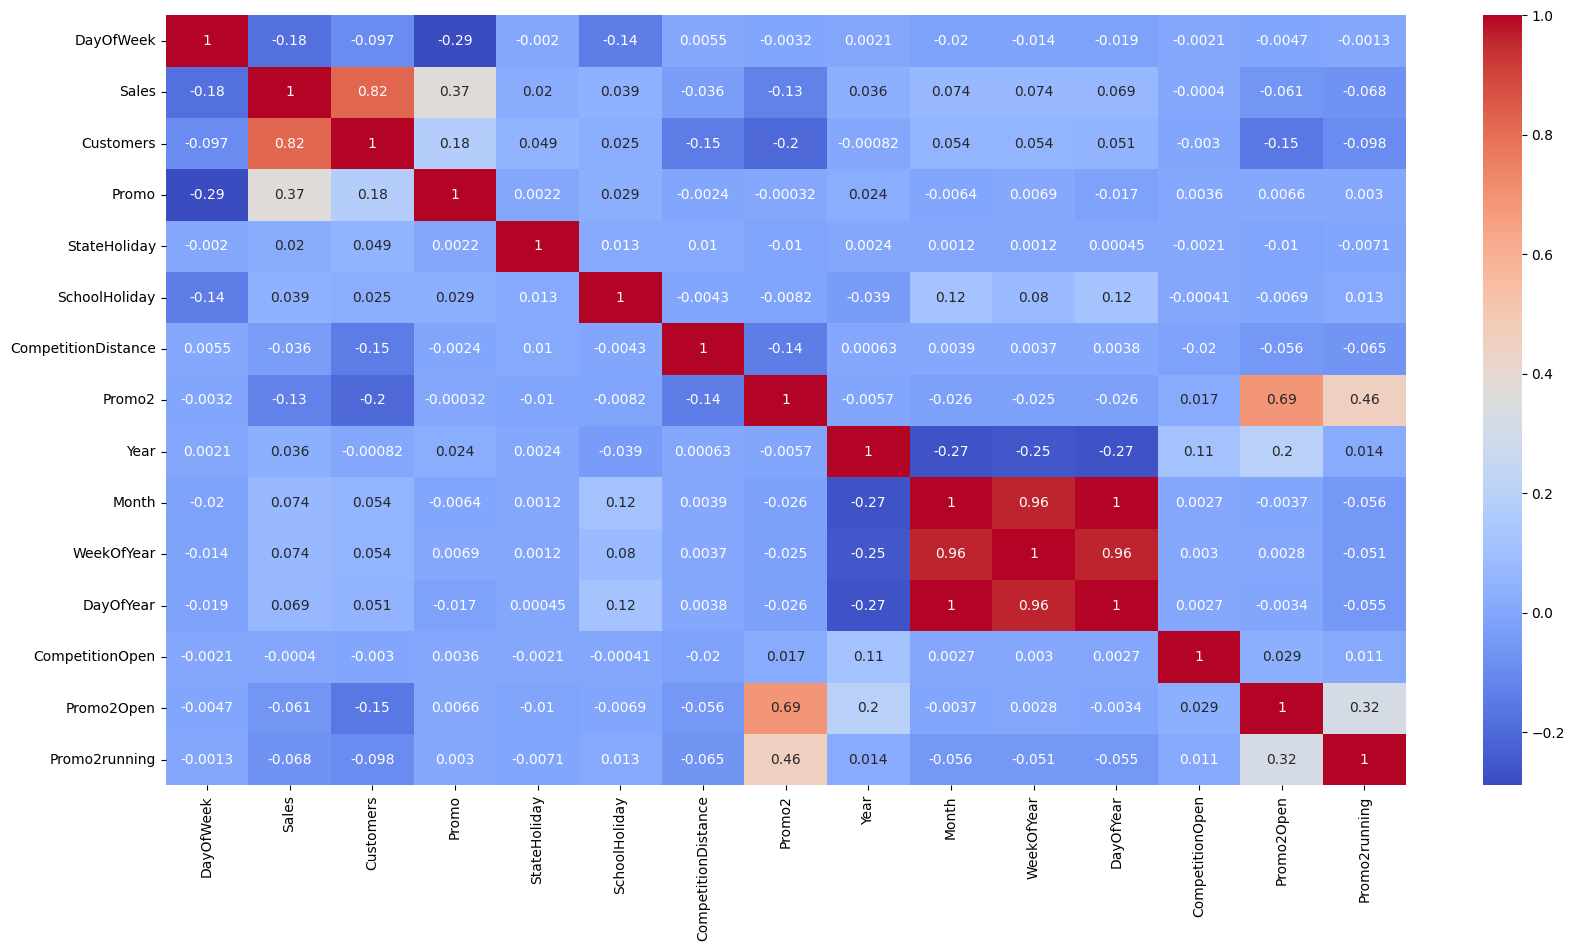

In [73]:
# Select your features wisely to avoid overfitting
#correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df1.corr(), cmap="coolwarm", annot=True)

##### What all feature selection methods have you used  and why?

The feture selection method used in this analysis is correlation matrix . This matrix show how the independent variables are affecting the dependent variable or target variable .

### 4. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [74]:
# Transform Your data
df2 = df1.copy()

In [75]:
## transformation
df2['Sales'] = np.log(df2['Sales'])

In [76]:
df2.dropna(inplace=True)

In [77]:
df2.drop(df2[df2['Sales'] == float("-inf")].index,inplace=True)

<Axes: ylabel='Density'>

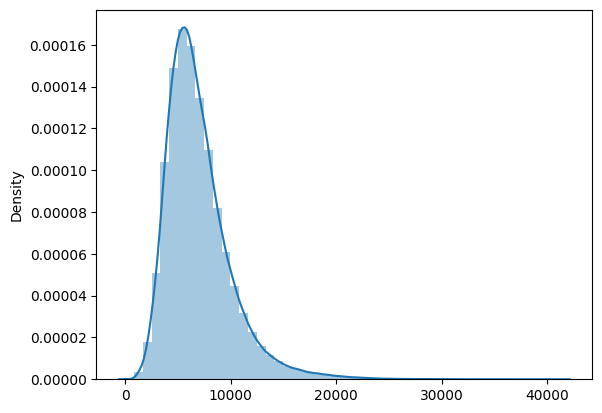

In [78]:
#distribution plot of Sales
sns.distplot(x=df1['Sales'])

In [79]:
#Sales should be the last col
columns=list(df2.columns)
columns.remove('Sales')
columns.append('Sales')
df2=df2[columns]

### 5. Data Splitting

In [80]:
# Split your data to train and test. Choose Splitting ratio wisely.

In [81]:
#slicing the most recent six weeks and creating train and test set
#train
start_train = pd.to_datetime("2013-01-01")
end_train = pd.to_datetime("2015-06-14")
df_train = df2.loc[start_train:end_train]
#test
start_test = pd.to_datetime("2015-06-15")
end_test = pd.to_datetime("2015-07-31")
df_test = df2.loc[start_test:end_test]

In [82]:
#X and y split for train and test 
X_train = df_train.drop('Sales',axis=1)
y_train = df_train[['Sales']]
X_test = df_test.drop('Sales',axis=1)
y_test = df_test[['Sales']]
print(f'The shape of X_train is: {X_train.shape}')
print(f'The shape of y_train is: {y_train.shape}')
print(f'The shape of X_test is: {X_test.shape}')
print(f'The shape of y_test is: {y_test.shape}')


The shape of X_train is: (798486, 16)
The shape of y_train is: (798486, 1)
The shape of X_test is: (45852, 16)
The shape of y_test is: (45852, 1)


In [83]:
X_train.head(2)

DayOfWeek  Customers  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                             
2013-01-01 85             2        619      0             1              1   
           259            2       1444      0             1              1   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2013-01-01 85            b          a               1870.0       0  2013   
           259           b          b                210.0       0  2013   

                  Month  WeekOfYear  DayOfYear  CompetitionOpen  Promo2Open  \
Date       Store                                                              
2013-01-01 85         1           1          1             15.0         0.0   
           259        1           1          1              0.0         0.0   

                  Promo2running  
Date       Store                 
2013-01-01 85                 0  
           259                0

In [84]:
y_train.head(2)

Sales
Date       Store         
2013-01-01 85     8.34759
           259    8.83215

##### What data splitting ratio have you used and why? 

The above Retail sales data seems to be a time series data . Because of most probably the the number of sales are depending on the year , month of year and day of week . So , the data is sorted as per date and I splitted the data in the way end of lat six weeks is test data and remaining data as train data .

### 6. Categorical Encoding

In [85]:
#importing
from sklearn.preprocessing import OneHotEncoder
#categorical features
categorical_cols = ['DayOfWeek', 'StoreType', 'Assortment']

# train
X_train = pd.get_dummies(X_train, columns=categorical_cols)
# test
X_test = pd.get_dummies(X_test, columns=categorical_cols)


In [86]:
X_train.columns

Index(['Customers', 'Promo', 'StateHoliday', 'SchoolHoliday',
       'CompetitionDistance', 'Promo2', 'Year', 'Month', 'WeekOfYear',
       'DayOfYear', 'CompetitionOpen', 'Promo2Open', 'Promo2running',
       'DayOfWeek_1', 'DayOfWeek_2', 'DayOfWeek_3', 'DayOfWeek_4',
       'DayOfWeek_5', 'DayOfWeek_6', 'DayOfWeek_7', 'StoreType_a',
       'StoreType_b', 'StoreType_c', 'StoreType_d', 'Assortment_a',
       'Assortment_b', 'Assortment_c'],
      dtype='object')

#### What all categorical encoding techniques have you used & why did you use those techniques?

The categorical technique used in this analysis is oneHotencoding for categorical variables . Because of it is simple to assign the correct values as per given business logic .

---



### 7. Data Scaling

In [87]:
# Scaling your data

In [88]:
# scaling
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train[list(X_train.columns)] = stdsc.fit_transform(X_train[list(X_train.columns)])
X_test[list(X_test.columns)] = stdsc.transform(X_test[list(X_test.columns)])

scaler = StandardScaler()
y_train[list(y_train.columns)] = scaler.fit_transform(y_train[list(y_train.columns)])
y_test[list(y_test.columns)] = scaler.transform(y_test[list(y_train.columns)])

## ***7. ML Model Implementation***

In [89]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [90]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_MAE', 'Train_MSE', 'Train_RMSE', 'Train_R2', 'Train_Adj_R2' ,'Test_MAE', 'Test_MSE', 'Test_RMSE', 'Test_R2', 'Train_Adj_R2']

In [91]:
#function to evaluate the model
def model_evaluation(model_name,model_variable,X_train,y_train,X_test,y_test):
  ''' This function predicts and evaluates various models for regression algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
      
  #making predictions
  y_pred_train = model_variable.predict(X_train)
  y_pred_test = model_variable.predict(X_test)

  # Plot the test results
  a = y_test.copy()
  a['Pred Sales'] = y_pred_test
  df_plot = a.reset_index(level=['Date'])
  plot = df_plot.groupby('Date')['Sales','Pred Sales'].sum()
  sns.lineplot(data = plot)
  plt.ylabel("Total Sales and Predicted Sales")
  plt.xticks(rotation = 25)

  #calculate metrics and print the results for test set
  #Mean Absolute Error or MAE
  MAE_train = round(mean_absolute_error(y_train,y_pred_train),6)
  MAE_test = round(mean_absolute_error(y_test,y_pred_test),6)
  #Mean Squared Error or MSE
  MSE_train = round(mean_squared_error(y_train,y_pred_train),6)
  MSE_test = round(mean_squared_error(y_test,y_pred_test),6)
  #Root Mean Squared Error or RMSE
  RMSE_train = round(mean_squared_error(y_train,y_pred_train,squared=False),6)
  RMSE_test = round(mean_squared_error(y_test,y_pred_test,squared=False),6)
  #R2
  R2_train = round(r2_score(y_train, y_pred_train),6)
  R2_test = round(r2_score(y_test, y_pred_test),6)
  #Adjusted R2
  Adj_r2_train = round(1 - (1-r2_score(y_train, y_pred_train)) * (len(y_train)-1)/(len(y_train)-X_train.shape[1]-1),6)
  Adj_r2_test = round(1 - (1-r2_score(y_test, y_pred_test)) * (len(y_test)-1)/(len(y_test)-X_test.shape[1]-1),6)
  #printing test results
  print(f'The Mean Absolute Error for the validation set is {MAE_test}')
  print(f'The Mean Squared Error for the validation set is {MSE_test}')
  print(f'The Root Mean Squared Error for the validation set is {RMSE_test}')
  print(f'The R^2 for the validation set is {R2_test}')
  print(f'The Adjusted R^2 for the validation set is {Adj_r2_test}')

  #Saving our results
  global comparison_columns
  metric_scores = [model_name,MAE_train,MSE_train,RMSE_train,R2_train,Adj_r2_train,MAE_test,MSE_test,RMSE_test,R2_test,Adj_r2_test]
  final_dict = dict(zip(comparison_columns,metric_scores))
  return [final_dict]

In [92]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

### ML Model - 1 - Linear Regression

In [93]:
# ML Model - 1 Implementation
from sklearn.linear_model import LinearRegression

linear_regression = LinearRegression()
# Fit the Algorithm
linear_regression.fit(X_train,y_train)


LinearRegression()

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [94]:
# Visualizing evaluation Metric Score chart

The Mean Absolute Error for the validation set is 0.368199
The Mean Squared Error for the validation set is 0.239221
The Root Mean Squared Error for the validation set is 0.489102
The R^2 for the validation set is 0.746042
The Adjusted R^2 for the validation set is 0.745893


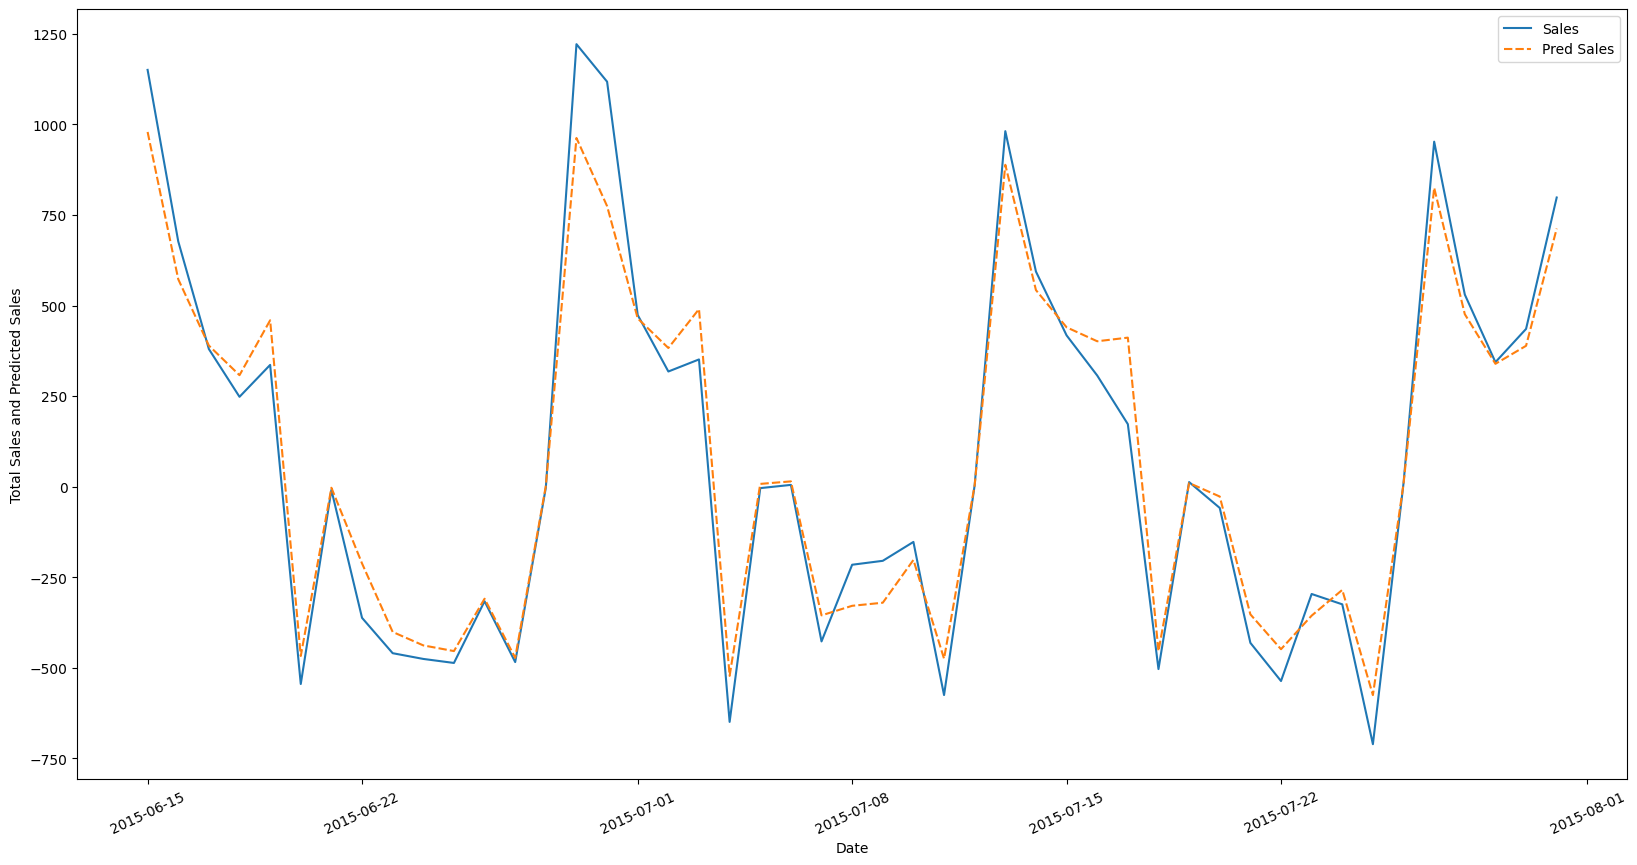

In [95]:

plt.figure(figsize=(20,10))
regressor = model_evaluation('Linear Regressor',linear_regression,X_train,y_train,X_test,y_test)

In [96]:
#add results to comparison df
add_list_to_final_df(regressor)

In [97]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Train_Adj_R2
0,Linear Regressor,0.374336,0.249574,0.499574,0.750426,0.745893,0.368199,0.239221,0.489102,0.746042,0.745893


### ML Model - 2 - Decision Tree Regressor

In [98]:
# ML Model - 1 Implementation
#Importing libraries 

from sklearn.tree import DecisionTreeRegressor

dt_basic = DecisionTreeRegressor(random_state=42)
# Fit the Algorithm

dt_basic.fit(X_train,y_train)


DecisionTreeRegressor(random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [99]:
# Visualizing evaluation Metric Score chart

The Mean Absolute Error for the validation set is 0.19772
The Mean Squared Error for the validation set is 0.074357
The Root Mean Squared Error for the validation set is 0.272685
The R^2 for the validation set is 0.921062
The Adjusted R^2 for the validation set is 0.921016


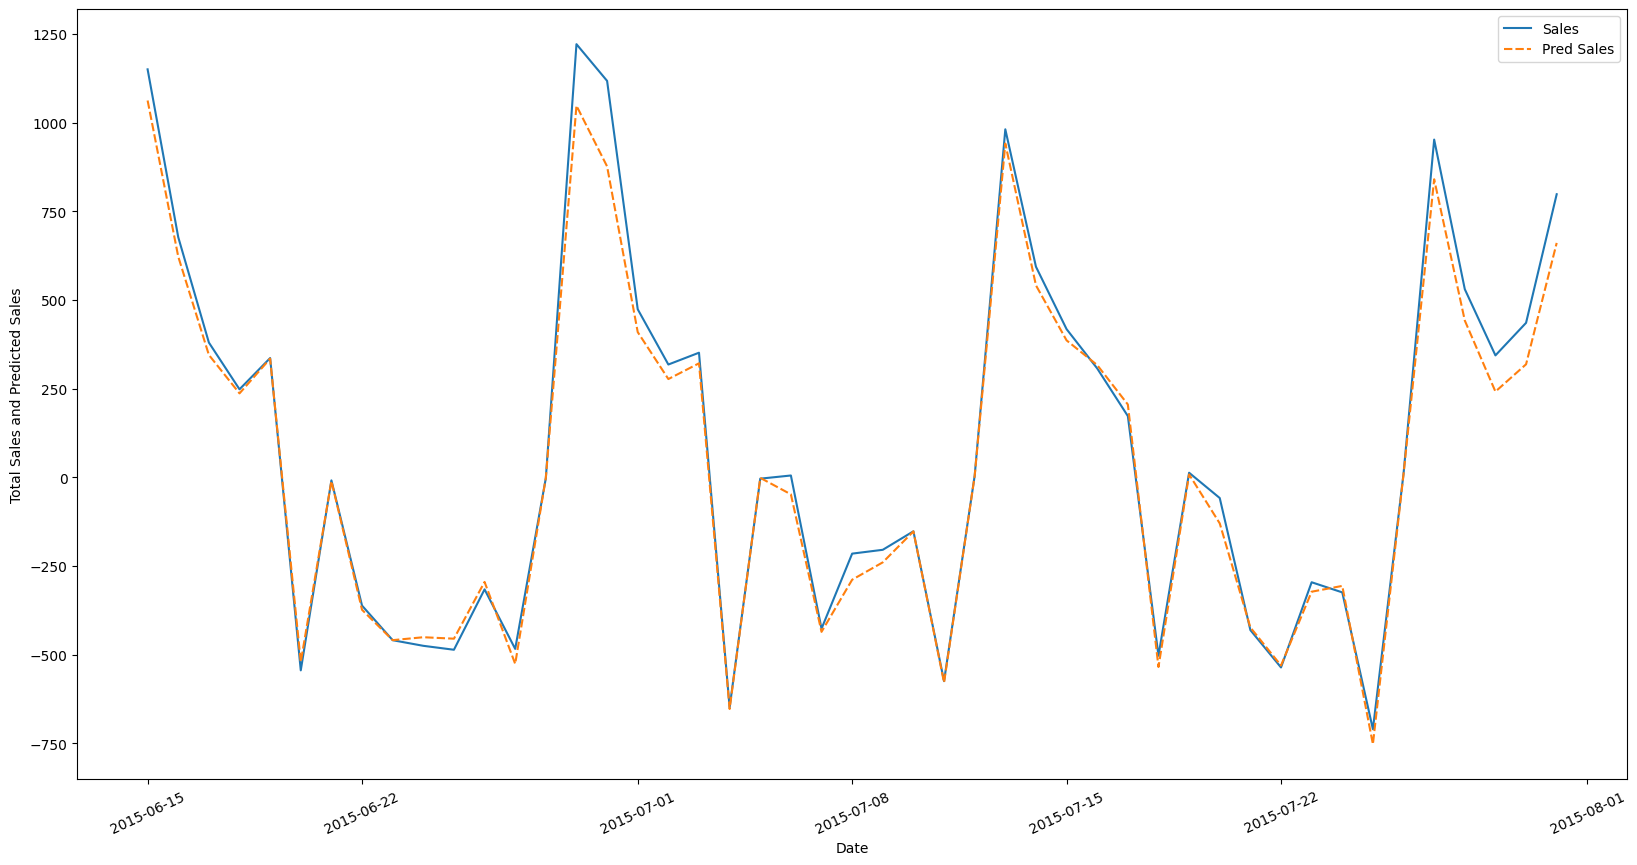

In [100]:

#decision tree evaluation
plt.figure(figsize=(20,10))
decision_tree = model_evaluation('Decision Tree Regressor',dt_basic,X_train,y_train,X_test,y_test)

In [101]:
#add results to comparison df
add_list_to_final_df(decision_tree)

In [102]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Train_Adj_R2
0,Linear Regressor,0.374336,0.249574,0.499574,0.750426,0.745893,0.368199,0.239221,0.489102,0.746042,0.745893
1,Decision Tree Regressor,0.000004,0.000001,0.001116,0.999999,0.921016,0.197720,0.074357,0.272685,0.921062,0.921016


### ML Model - 3 - Random Forest Regression

In [103]:
# ML Model - 1 Implementation
#Importing libraries 
# importing

from sklearn.ensemble import RandomForestRegressor
     
random_forest = RandomForestRegressor(n_estimators=25,random_state=42)

# Fit the Algorithm
random_forest.fit(X_train,y_train)
     


RandomForestRegressor(n_estimators=25, random_state=42)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [104]:
# Visualizing evaluation Metric Score chart

The Mean Absolute Error for the validation set is 0.145039
The Mean Squared Error for the validation set is 0.037368
The Root Mean Squared Error for the validation set is 0.193309
The R^2 for the validation set is 0.96033
The Adjusted R^2 for the validation set is 0.960306


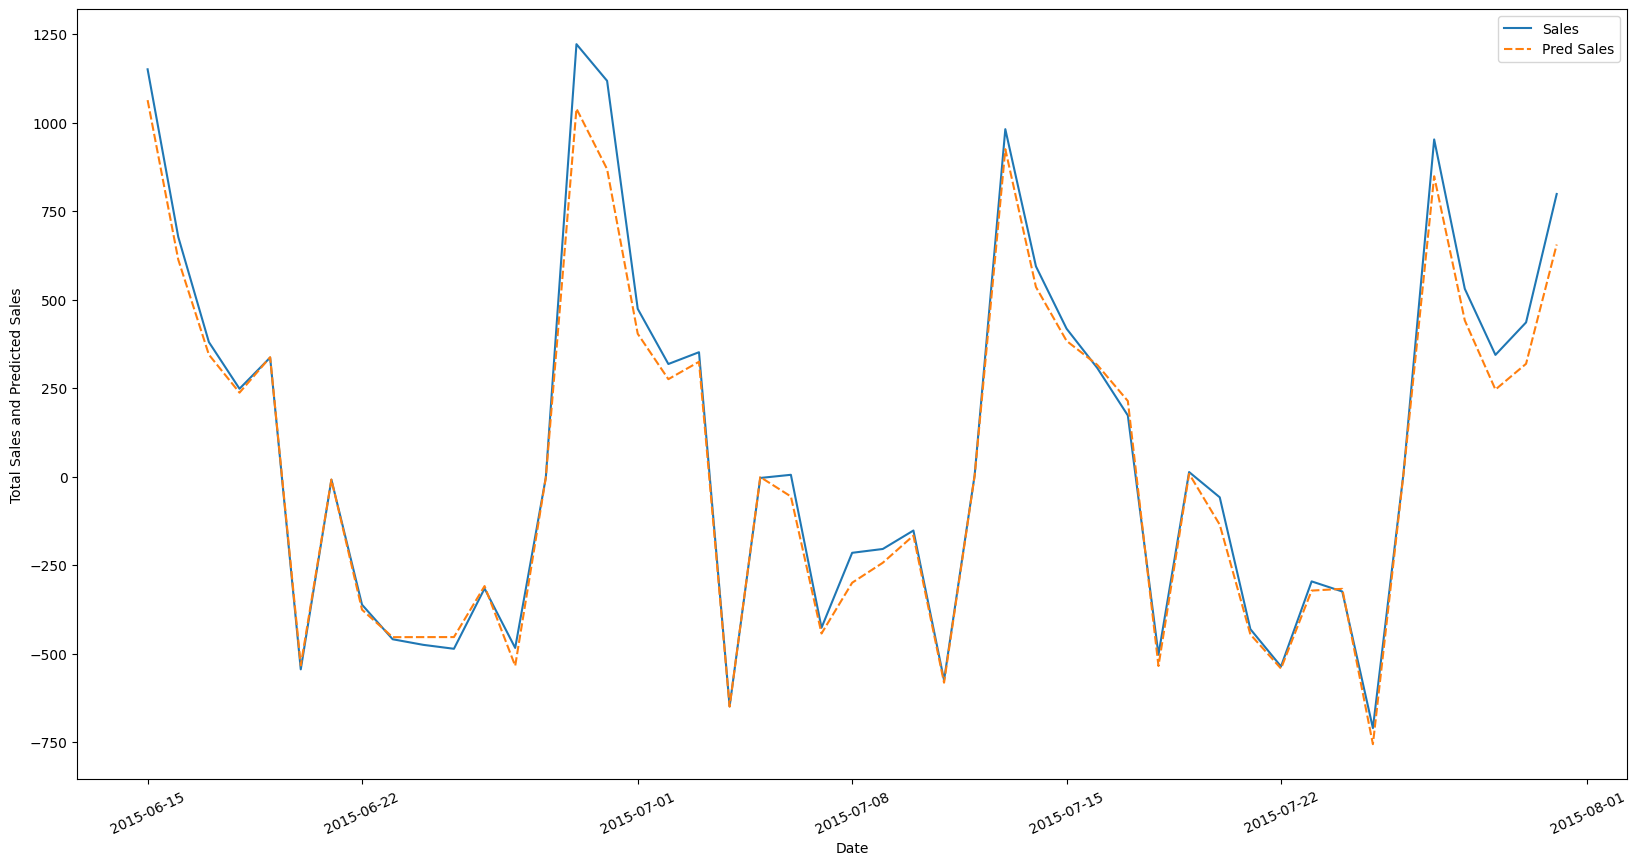

In [105]:

#random forest  evaluation
plt.figure(figsize=(20,10))
random_f = model_evaluation('Random Forest Regressor',random_forest,X_train,y_train,X_test,y_test)

In [106]:
#add results to comparison df
add_list_to_final_df(random_f)

In [107]:
#comparison df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Train_Adj_R2
0,Linear Regressor,0.374336,0.249574,0.499574,0.750426,0.745893,0.368199,0.239221,0.489102,0.746042,0.745893
1,Decision Tree Regressor,0.000004,0.000001,0.001116,0.999999,0.921016,0.197720,0.074357,0.272685,0.921062,0.921016
2,Random Forest Regressor,0.045645,0.004042,0.063574,0.995958,0.960306,0.145039,0.037368,0.193309,0.960330,0.960306


In [108]:
#parameters used in random forest
print('Parameters currently in use:')
print(random_forest.get_params())

Parameters currently in use:
{'bootstrap': True, 'ccp_alpha': 0.0, 'criterion': 'squared_error', 'max_depth': None, 'max_features': 1.0, 'max_leaf_nodes': None, 'max_samples': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 1, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'n_estimators': 25, 'n_jobs': None, 'oob_score': False, 'random_state': 42, 'verbose': 0, 'warm_start': False}


**Observation:**<br>

Random Forest Regressor results were much better than other models. Next we'll try to tune the hyperparameters and check the results.

#### 2. Cross- Validation & Hyperparameter Tuning

In [109]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
# Create model

rf_tuned = RandomForestRegressor()


In [111]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True],
 'max_depth': [None],
 'max_features': ['auto'],
 'min_samples_leaf': [1],
 'min_samples_split': [2],
 'n_estimators': [30]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 1, cv = 2, verbose=2, random_state=42)

#fitting
rf_random.fit(X_train,y_train)

Fitting 2 folds for each of 1 candidates, totalling 2 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time= 1.8min
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=30; total time= 1.6min


RandomizedSearchCV(cv=2, estimator=RandomForestRegressor(), n_iter=1,
                   param_distributions={'bootstrap': [True],
                                        'max_depth': [None],
                                        'max_features': ['auto'],
                                        'min_samples_leaf': [1],
                                        'min_samples_split': [2],
                                        'n_estimators': [30]},
                   random_state=42, verbose=2)

In [112]:
#best para
rf_random.best_params_

{'n_estimators': 30,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': None,
 'bootstrap': True}

In [113]:
#save the best parameters
random_t = rf_random.best_estimator_

The Mean Absolute Error for the validation set is 0.144764
The Mean Squared Error for the validation set is 0.037286
The Root Mean Squared Error for the validation set is 0.193096
The R^2 for the validation set is 0.960417
The Adjusted R^2 for the validation set is 0.960394


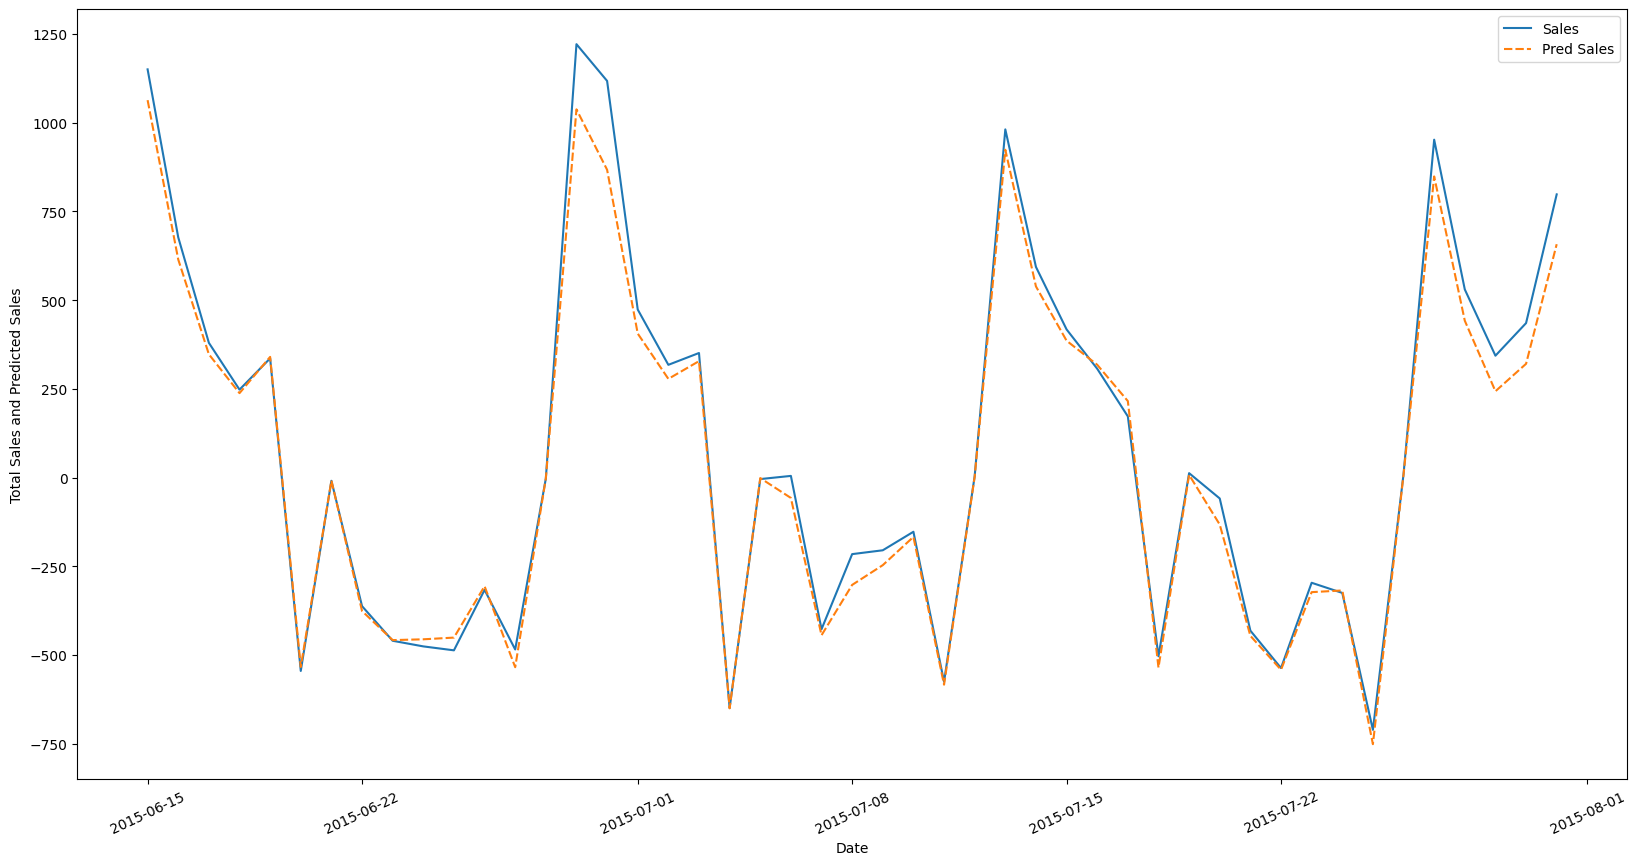

In [114]:
#evaluate tuned model
plt.figure(figsize=(20,10))
random_tuned = model_evaluation('Random Forest Tuned',random_t,X_train,y_train,X_test,y_test)

In [115]:
#add to comparison_df
#add results to comparison df
add_list_to_final_df(random_tuned)

In [116]:
#comparison_df
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Train_Adj_R2
0,Linear Regressor,0.374336,0.249574,0.499574,0.750426,0.745893,0.368199,0.239221,0.489102,0.746042,0.745893
1,Decision Tree Regressor,0.000004,0.000001,0.001116,0.999999,0.921016,0.197720,0.074357,0.272685,0.921062,0.921016
2,Random Forest Regressor,0.045645,0.004042,0.063574,0.995958,0.960306,0.145039,0.037368,0.193309,0.960330,0.960306
3,Random Forest Tuned,0.045087,0.003918,0.062593,0.996082,0.960394,0.144764,0.037286,0.193096,0.960417,0.960394


##### Which hyperparameter optimization technique have you used and why?

In this I used RandomSearchCv for hyperparameter otimization .Because of Randomized Search CV can help you avoid overfitting by selecting a random subset of hyperparameters instead of exhaustively searching through all possible hyperparameters. This can help you to identify the best combination of hyperparameters without overfitting to the training data.

### Feature Importance

<Axes: xlabel='Importance', ylabel='Variable'>

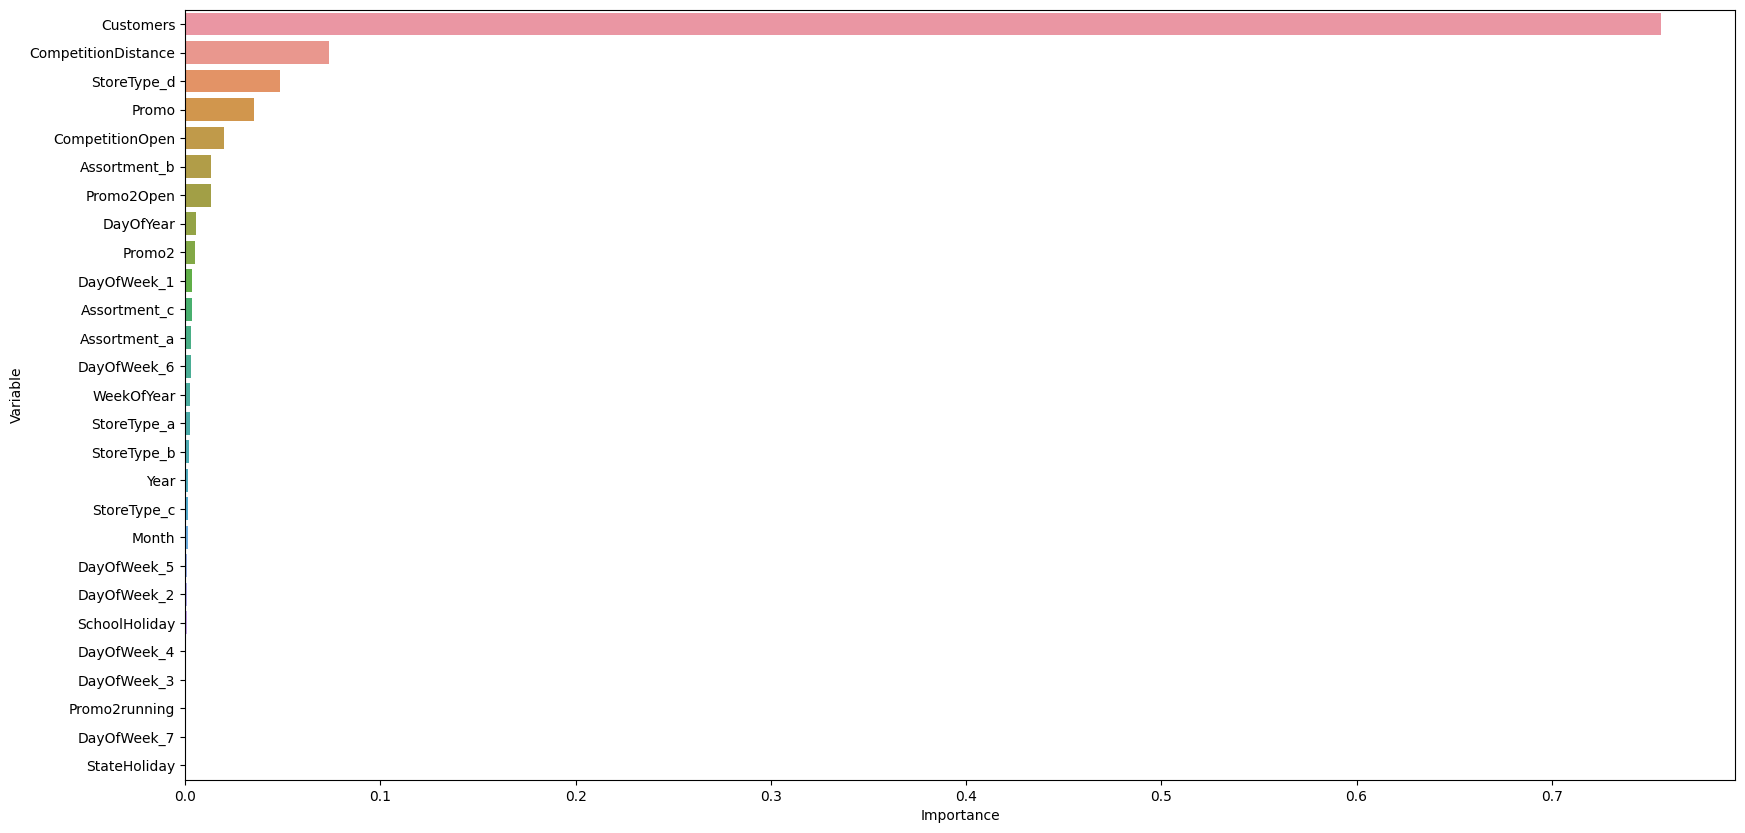

In [117]:
#visualising feature importance of XGB
feature_imp = pd.DataFrame({"Variable": X_test.columns,"Importance": random_t.feature_importances_})
feature_imp.sort_values(by="Importance", ascending=False, inplace = True)
plt.figure(figsize=(20,10))
sns.barplot(x=feature_imp['Importance'], y= feature_imp['Variable'])
     


**Model Performance and Evaluation**

In [118]:
#Taking a look of our final comparison dataframe
comparison_df

,Model_Name,Train_MAE,Train_MSE,Train_RMSE,Train_R2,Train_Adj_R2,Test_MAE,Test_MSE,Test_RMSE,Test_R2,Train_Adj_R2
0,Linear Regressor,0.374336,0.249574,0.499574,0.750426,0.745893,0.368199,0.239221,0.489102,0.746042,0.745893
1,Decision Tree Regressor,0.000004,0.000001,0.001116,0.999999,0.921016,0.197720,0.074357,0.272685,0.921062,0.921016
2,Random Forest Regressor,0.045645,0.004042,0.063574,0.995958,0.960306,0.145039,0.037368,0.193309,0.960330,0.960306
3,Random Forest Tuned,0.045087,0.003918,0.062593,0.996082,0.960394,0.144764,0.037286,0.193096,0.960417,0.960394


<Axes: xlabel='Test_R2', ylabel='Model_Name'>

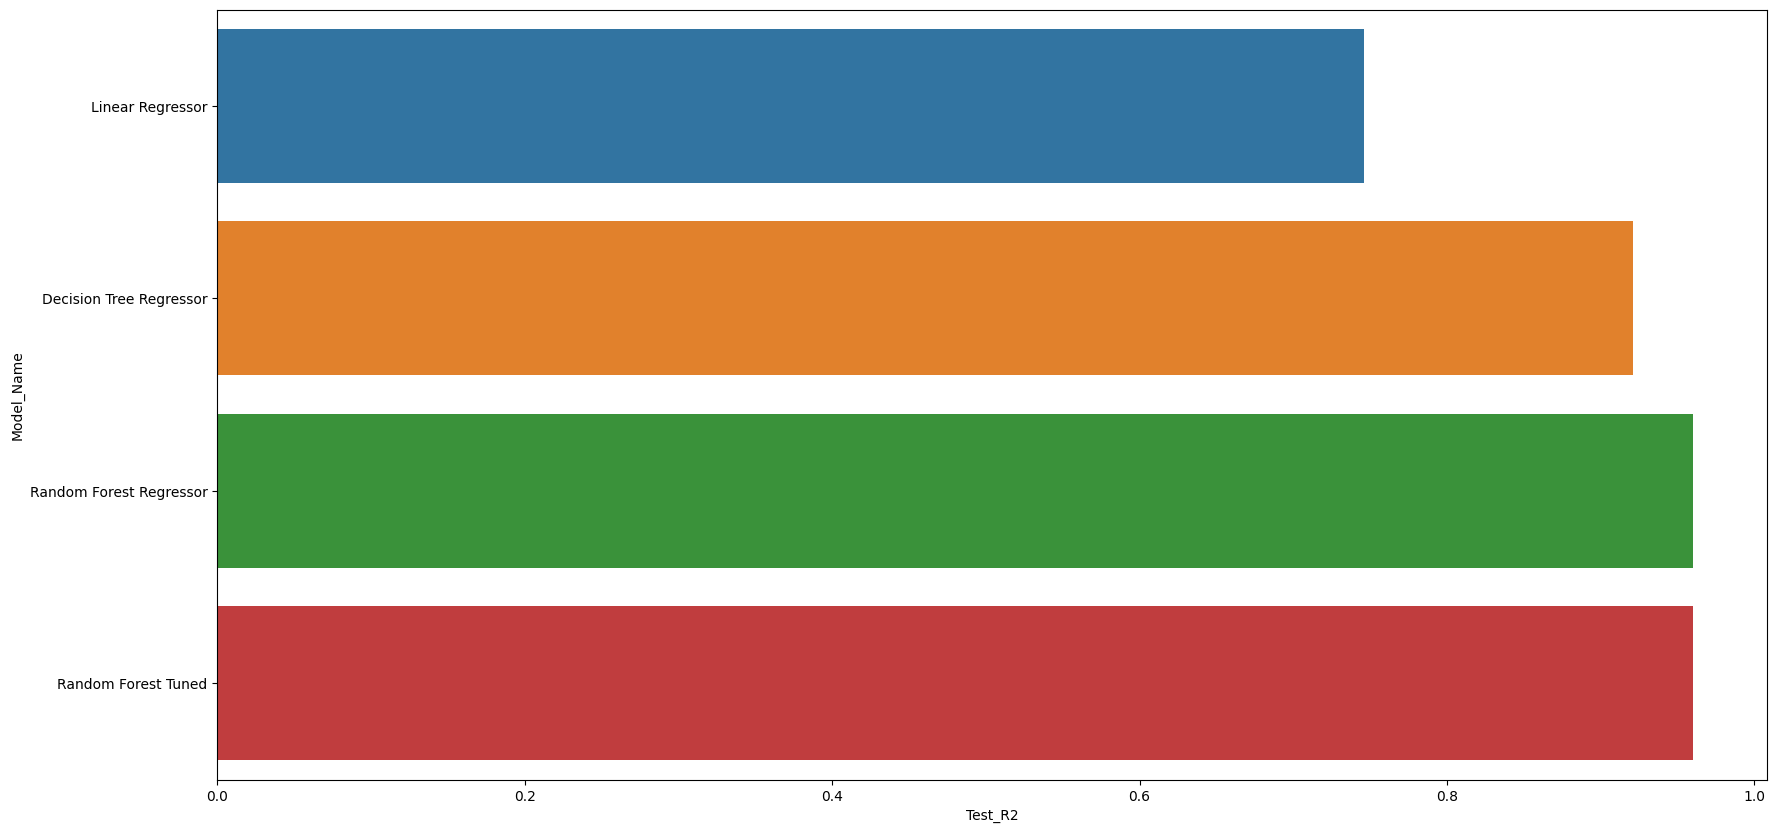

In [119]:
#visualising our comparison df for Test R2
plt.figure(figsize=(20,10))
sns.barplot(y=comparison_df['Model_Name'], x = comparison_df['Test_R2'])

In [120]:
#test values
linear_r2 = 0.746042
baseline_r2 = 0.915750
random_r2 = 0.955673
r_tuned_r2 = 0.955878

In [121]:
#improvement % 
improvement_r = ((baseline_r2 - linear_r2)/linear_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Decision Tree against Linear Regression.')

Model Performance
Improvement of 22.748 % was seen in Decision Tree against Linear Regression.


In [122]:
#improvement % 
improvement_r = ((random_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 4.36 % was seen in Random Forest against Decision Tree.


In [123]:
#improvement % of tuned vs baseline

improvement_r = ((r_tuned_r2 - baseline_r2)/baseline_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Decision Tree.')

Model Performance
Improvement of 4.382 % was seen in Random Forest Tuned against Decision Tree.


In [124]:
#improvement % of tuned vs simple random forest
improvement_r = ((r_tuned_r2 - random_r2)/random_r2)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 0.021 % was seen in Random Forest Tuned against Simple Random Forest.


**Store wise Sales Predictions**

In [125]:
#predictions 
y_pred_test = random_t.predict(X_test)
six_weeks_sales_df = y_test.copy()
six_weeks_sales_df['Pred_Sales'] = y_pred_test.tolist()

In [126]:
#head
six_weeks_sales_df.head()
     

Sales  Pred_Sales
Date       Store                      
2015-06-15 1     -0.328664   -0.510672
           2      0.574378    0.603925
           3      1.252047    1.385330
           4      1.572145    1.412907
           5      0.486429    0.393929

In [127]:
#importing minmax scaler
from sklearn.preprocessing import MinMaxScaler
#fitting to the original data
cleaned_unscaled_data= df1.copy()
#fitting numerical columns
numerical_cols = ['Sales']
scaler = MinMaxScaler()
scaler.fit(cleaned_unscaled_data[numerical_cols])
     

MinMaxScaler()

In [ ]:
#inverse
six_weeks_sales_df[['Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Sales']])
six_weeks_sales_df[['Pred_Sales']] = scaler.inverse_transform(six_weeks_sales_df[['Pred_Sales']])

In [ ]:
#sales vs predictions
six_weeks_sales_df.head()

Sales    Pred_Sales
Date       Store                            
2015-06-15 1     -13656.323293 -21218.930102
           2      23865.972114  25093.685777
           3      52023.801195  57561.852404
           4      65324.180406  58707.704514
           5      20211.621979  16368.153881

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-06-15',5)]

In [ ]:
#locating
six_weeks_sales_df.loc[('2015-07-28',56)]

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

I can choose R2 Score as evalution metrics to this regression model . Because of the R2 score allows you to compare the performance of different regression models on the same dataset. A higher R2 score indicates that the model is a better fit for the data.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

The tuned Random forest regression model is choosen as bestfit model . Because of this model showing R2 score for trained and test data is nearly 96% which means this model solves the error of 96% of the data and only unsolved error is nearly 4% of the data . So, it seems to be a genaralised model for the given data .

# **Conclusion**

**Conclusion**<br>
Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.<br>

The work here forecasts the sales of the various Rossmann stores across Europe for the recent six weeks and compares the results from the models developed with the actual sales values.<br>

Some important conclusions drawn from the analysis are as follows:<br>

* There were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* The positive effect of promotion on Customers and Sales is observable.
* Most stores have competition distance within the range of 0 to 10 kms and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* Store type B though being few in number had the highest sales average. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* Random Forest Tuned Model gave the best results and only 0.021% improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.


**Recommendations** <br>
* More stores should be encouraged for promotion.
* Store type B should be increased in number. 
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.